# Análisis de Rutas Combinadas
Este notebook está dedicado a la extracción y análisis de rutas específicas que son de nuestro interés, mediante la comparación de diversas métricas asignadas a cada ruta. Utilizamos estas comparativas para identificar patrones, eficiencias o áreas de mejora en las rutas seleccionadas.

A lo largo de este análisis, generamos visualizaciones que nos permiten observar no solo las métricas de interés, sino también el contexto más amplio en el que se desarrollan nuestras rutas. Este enfoque nos facilita una comprensión más profunda de los datos, permitiéndonos tomar decisiones informadas sobre posibles ajustes o mejoras.



# Combinaciones de rutas

In [1]:
import pandas as pd
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim
from unidecode import unidecode
import unidecode
import numpy as np
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

In [2]:
mun_shp = gpd.read_file('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\areas\\municipiosrisk.shp')
#mun_shp.to_file('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\areas\\municipiosrisk.shp')



In [3]:
mun_shp.head()


,nommun,cvemun,nomedo,area,vio_muj,risk2_trat,risk2_abus,risk2_esta,risk2_dels,vio_inst,criorg_nor,geometry
0,"Aguascalientes, Aguascalientes",1001,Aguascalientes,1168.762384,36.008395,28.187135,13.268622,11.241027,44.329640,37.269500,11.725103,"POLYGON ((-102.14207 22.07321, -102.12842 22.0..."
1,"Asientos, Aguascalientes",1002,Aguascalientes,547.762077,1.969570,NaN,NaN,NaN,1.365651,1.138108,1.785518,"POLYGON ((-102.12322 22.28697, -102.11973 22.2..."
2,"Calvillo, Aguascalientes",1003,Aguascalientes,931.300088,1.934942,NaN,NaN,NaN,1.822715,1.310742,1.383481,"POLYGON ((-102.80641 21.99334, -102.80511 21.9..."
3,"Cosio, Aguascalientes",1004,Aguascalientes,128.907513,1.277020,NaN,NaN,NaN,1.091413,1.034527,1.247407,"POLYGON ((-102.29781 22.45899, -102.29616 22.4..."
4,"El Llano, Aguascalientes",1010,Aguascalientes,500.861359,1.277020,NaN,NaN,NaN,1.639889,1.241688,1.111333,"POLYGON ((-102.09788 22.02335, -102.08893 22.0..."


In [37]:
extclim = gpd.read_file('C:\\Users\\puria\\Downloads\\889463860136_s\\conjunto_de_datos\\datos regionales\\1series promedio\\mensuales\\promedios_regionales_mensuales_y_estacionales_tmaxmean.shp')

In [54]:
extclimmin = gpd.read_file('C:\\Users\\puria\\Downloads\\889463860136_s\\conjunto_de_datos\\datos regionales\\1series promedio\\mensuales\\promedios_regionales_mensuales_y_estacionales_tminmean.shp')

In [60]:
extclim.head(1)

,R_CLIM,NR_CLIM,INICIO,FIN,AÑOS_REG,AÑOS_1,AÑOS_2,AÑOS_3,AÑOS_4,AÑOS_5,AÑOS_6,AÑOS_7,AÑOS_8,AÑOS_9,AÑOS_10,AÑOS_11,AÑOS_12,AÑOS_13,AÑOS_14,AÑOS_15,AÑOS_16,AÑOS_17,TMAXMEAP_1,TMAXMEAP_2,TMAXMEAP_3,TMAXMEAP_4,TMAXMEAP_5,TMAXMEAP_6,TMAXMEAP_7,TMAXMEAP_8,TMAXMEAP_9,TMAXMEAP10,TMAXMEAP11,TMAXMEAP12,TMAXMEAP13,TMAXMEAP14,TMAXMEAP15,TMAXMEAP16,TMAXMEAP17,Cal_pos,Shape_Leng,Shape_Area,geometry,ITME
0,6,Noreste,1921,2012,92,89,89,89,89,89,89,89,89,89,89,89,89,88,89,89,89,89,21.4,24.0,27.9,31.3,33.4,34.8,35.1,35.3,32.5,29.4,25.4,22.1,29.4,22.6,30.9,35.1,29.1,Aproximada,34.665793,14.516201,"MULTIPOLYGON (((-10881776.031 2738152.370, -10...",1.38075


In [61]:
extclimmin.head(1)

,R_CLIM,NR_CLIM,INICIO,FIN,AÑOS_REG,AÑOS_1,AÑOS_2,AÑOS_3,AÑOS_4,AÑOS_5,AÑOS_6,AÑOS_7,AÑOS_8,AÑOS_9,AÑOS_10,AÑOS_11,AÑOS_12,AÑOS_13,AÑOS_14,AÑOS_15,AÑOS_16,AÑOS_17,TMINMEAP_1,TMINMEAP_2,TMINMEAP_3,TMINMEAP_4,TMINMEAP_5,TMINMEAP_6,TMINMEAP_7,TMINMEAP_8,TMINMEAP_9,TMINMEAP10,TMINMEAP11,TMINMEAP12,TMINMEAP13,TMINMEAP14,TMINMEAP15,TMINMEAP16,TMINMEAP17,Cal_pos,Shape_Leng,Shape_Area,geometry,ITmE
0,6,Noreste,1921,2012,92,89,89,89,89,89,89,89,89,89,89,89,89,88,89,89,89,89,7.6,9.3,12.6,16.3,19.4,21.3,21.6,21.5,20.0,16.3,11.6,8.4,15.4,8.4,16.1,21.5,16.0,Aproximada,34.665793,14.516201,"MULTIPOLYGON (((-10881776.031 2738152.370, -10...",-0.353233


In [23]:
print(extclim.columns)

Index(['R_CLIM', 'NR_CLIM', 'INICIO', 'FIN', 'AÑOS_REG', 'AÑOS_1', 'AÑOS_2',
       'AÑOS_3', 'AÑOS_4', 'AÑOS_5', 'AÑOS_6', 'AÑOS_7', 'AÑOS_8', 'AÑOS_9',
       'AÑOS_10', 'AÑOS_11', 'AÑOS_12', 'AÑOS_13', 'AÑOS_14', 'AÑOS_15',
       'AÑOS_16', 'AÑOS_17', 'TMAXMEAP_1', 'TMAXMEAP_2', 'TMAXMEAP_3',
       'TMAXMEAP_4', 'TMAXMEAP_5', 'TMAXMEAP_6', 'TMAXMEAP_7', 'TMAXMEAP_8',
       'TMAXMEAP_9', 'TMAXMEAP10', 'TMAXMEAP11', 'TMAXMEAP12', 'TMAXMEAP13',
       'TMAXMEAP14', 'TMAXMEAP15', 'TMAXMEAP16', 'TMAXMEAP17', 'Cal_pos',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


In [57]:
import pandas as pd

# Supongamos que 'extclim' es tu DataFrame con las columnas mencionadas
extclim_columns = ['TMAXMEAP16']

# Verificar si las columnas están presentes en el DataFrame
missing_columns = [col for col in extclim_columns if col not in extclim.columns]
if missing_columns:
    print(f"Faltan las siguientes columnas: {missing_columns}")
else:
    # Calcular los promedios de las columnas TMAXMEANP
    extclim['TMAXMEAP16'] = extclim[extclim_columns].mean(axis=1)

    # Obtener estadísticas históricas
    media_max_hist = extclim['TMAXMEAP16'].mean()
    desv_max_hist = extclim['TMAXMEAP16'].std()

    # Calcular el índice de temperatura máxima extrema (ITME)
    extclim['ITME'] = (extclim['TMAXMEAP16'] - media_max_hist) / desv_max_hist

    # Mostrar los primeros registros
  # print(extclim.head())

# Calcular la media histórica y la desviación estándar
media_min_hist = extclimmin['TMINMEAP14'].mean()
desv_min_hist = extclimmin['TMINMEAP14'].std()

# Calcular el índice de temperatura mínima extrema (ITmE)
extclimmin['ITmE'] = (extclimmin['TMINMEAP14'] - media_min_hist) / desv_min_hist

# Ver las primeras filas con el nuevo cálculo de ITmE
#print(extclimmin.head())


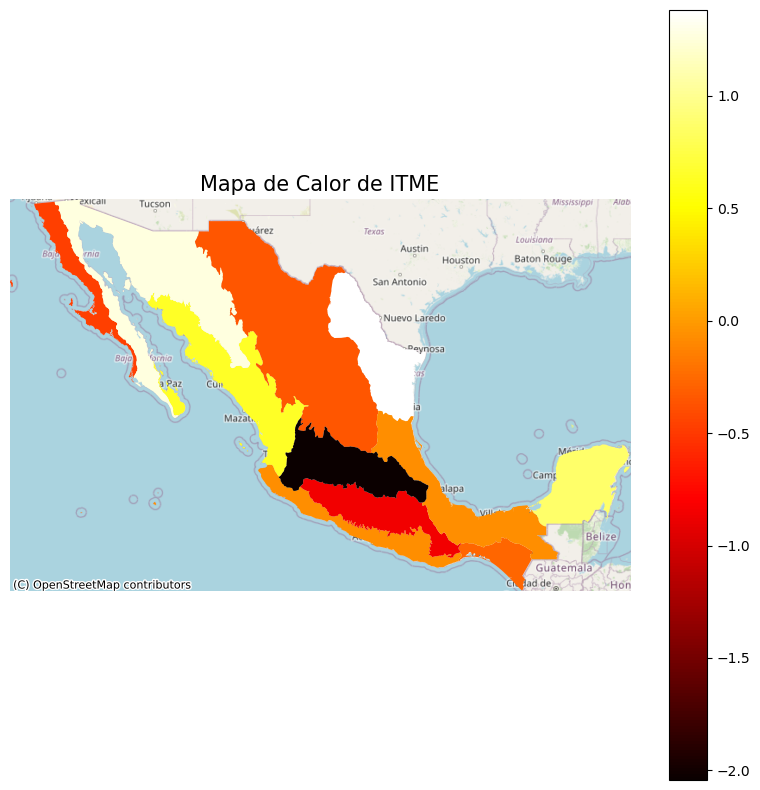

In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Supongamos que 'extclim' es tu GeoDataFrame con las columnas 'geometry' y 'TMAXMEANP_prom'

# Convertir a GeoDataFrame si no lo es ya
# extclim = gpd.GeoDataFrame(extclim, geometry='geometry')

# Verificar el sistema de coordenadas (CRS) y establecer uno si es necesario
if extclim.crs is None:
    extclim.set_crs(epsg=4326, inplace=True)  # WGS84

# Proyectar al CRS adecuado para agregar un mapa base
extclim = extclim.to_crs(epsg=3857)  # Web Mercator

# Crear el mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
extclim.plot(column='ITME', cmap='hot', legend=True, ax=ax)

# Cambiar el proveedor del mapa base a OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Ajustar los límites del mapa para mostrar todos los datos
ax.set_xlim(extclim.total_bounds[[0, 2]])
ax.set_ylim(extclim.total_bounds[[1, 3]])

# Títulos y etiquetas
ax.set_title('Mapa de Calor de ITME', fontsize=15)
ax.set_axis_off()

# Mostrar el mapa
plt.show()



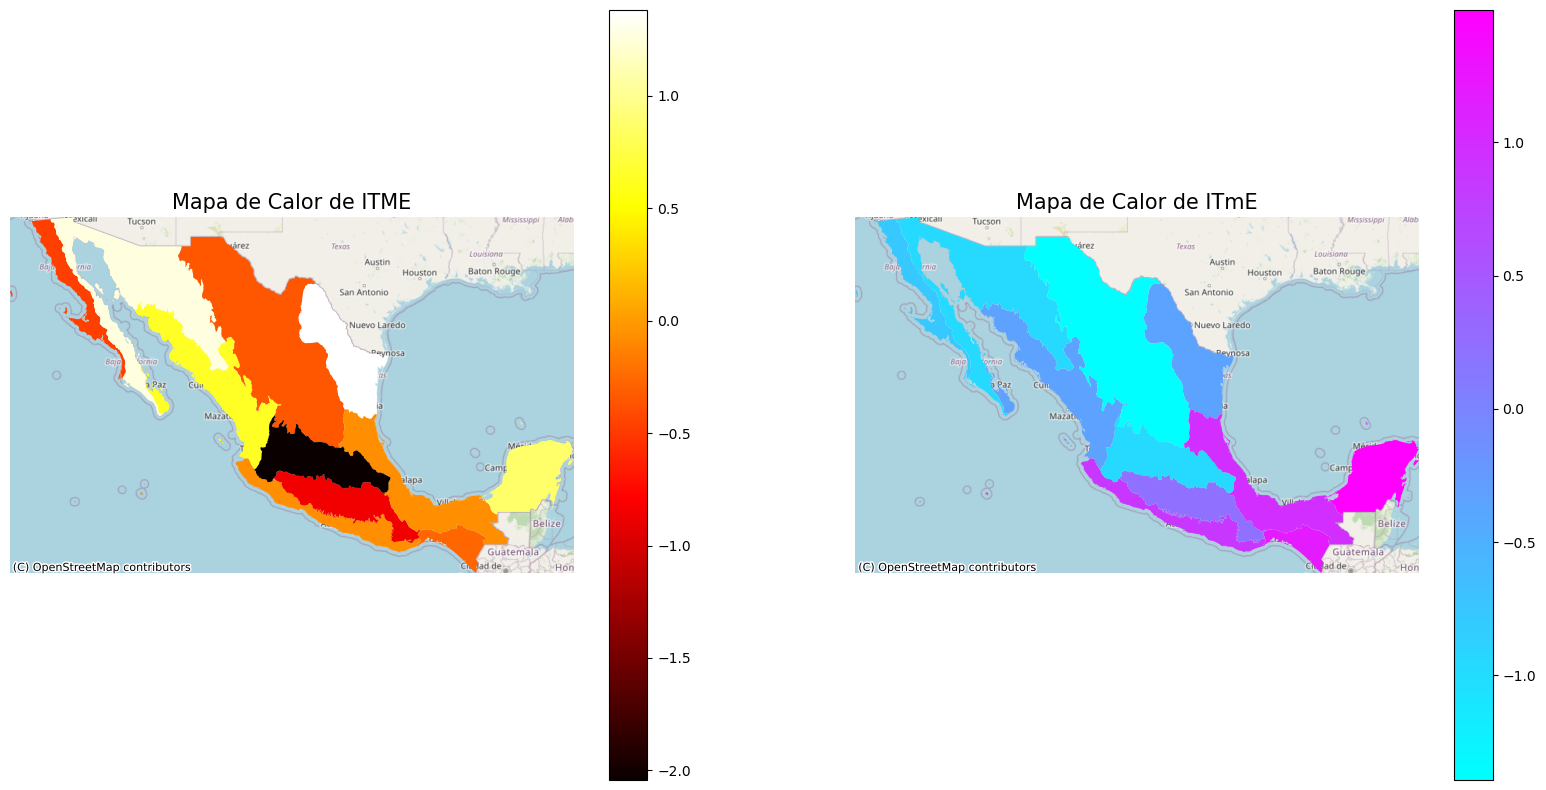

In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Supongamos que 'extclim' y 'extclimmin' son tus GeoDataFrames con las columnas 'geometry', 'ITME' y 'ITmE'

# Convertir a GeoDataFrame si no lo son ya
# extclim = gpd.GeoDataFrame(extclim, geometry='geometry')
# extclimmin = gpd.GeoDataFrame(extclimmin, geometry='geometry')

# Verificar el sistema de coordenadas (CRS) y establecer uno si es necesario
if extclim.crs is None:
    extclim.set_crs(epsg=4326, inplace=True)  # WGS84

if extclimmin.crs is None:
    extclimmin.set_crs(epsg=4326, inplace=True)  # WGS84

# Proyectar al CRS adecuado para agregar un mapa base
extclim = extclim.to_crs(epsg=3857)  # Web Mercator
extclimmin = extclimmin.to_crs(epsg=3857)  # Web Mercator

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot para ITME
extclim.plot(column='ITME', cmap='hot', legend=True, ax=ax1)
ctx.add_basemap(ax1, source=ctx.providers.OpenStreetMap.Mapnik)
ax1.set_xlim(extclim.total_bounds[[0, 2]])
ax1.set_ylim(extclim.total_bounds[[1, 3]])
ax1.set_title('Mapa de Calor de ITME', fontsize=15)
ax1.set_axis_off()

# Plot para ITmE
extclimmin.plot(column='ITmE', cmap='cool', legend=True, ax=ax2)
ctx.add_basemap(ax2, source=ctx.providers.OpenStreetMap.Mapnik)
ax2.set_xlim(extclimmin.total_bounds[[0, 2]])
ax2.set_ylim(extclimmin.total_bounds[[1, 3]])
ax2.set_title('Mapa de Calor de ITmE', fontsize=15)
ax2.set_axis_off()

# Mostrar el mapa
plt.show()


In [6]:
#df_secuencias = pd.read_csv("C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\procesamiento de rutas\\Secuencias_Final.csv")
df_secuencias = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv')

In [12]:
arcos = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.csv")

In [8]:
#arcosgdp = gpd.read_file("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.shp")

In [17]:
#arcosgdp.to_file("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.shp")

In [4]:
values_gdf1 = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.csv')
#values_gdf1 = pd.read_csv('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\df_valores_rutas.csv')

In [63]:
inm = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/instituciones/estaciones INM/inm_gdp.csv')
sc = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/3.datos/1. distribution_infraestructura/2. SC Instituciones/Facility_Directory.csv')


In [62]:
#inm_unique.to_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/instituciones/estaciones INM/inm_gdp.csv')
#df_merged.to_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/3.datos/1. distribution_infraestructura/2. SC Instituciones/Facility_Directory.csv')


In [98]:
#values_gdf1 = pd.read_csv('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\df_valores_rutas.csv')

In [104]:
#gdf.to_csv('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\df_valores_rutas.csv')
#gdf.to_file('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\df_valores_rutas.shp')

C:\Users\puria\AppData\Local\Temp\ipykernel_14728\804117778.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\df_valores_rutas.shp')


In [60]:
#sc.columns = sc.columns.str.lower()

# Cambiar el nombre de la columna 'old_name' a 'new_name'
#inm = inm.rename(columns={"id_poligono": "id_poligon"})

# Eliminar duplicados en 'df2' basándose en 'col1'
df2_unique = values_gdf1.drop_duplicates(subset=['estado'])

# Realizar el merge para agregar 'col2' de 'df2_unique' a 'df1'
df_merged = sc.merge(df2_unique[['estado', 'region']], on='estado', how='left')


In [64]:
sc

,Unnamed: 0,organization name,facility name,tipo,direccion,latitud,longitud,estado,municipio,geometry,fuente,region
0,0,NaN,Oficina de la Comisión Nacional de los Derecho...,Justicia / Derechos Humanos / Seguridad / Orga...,"Calle Cristóbal Colón 12, Fraccionamiento Cost...",16.850921,-99.850158,Guerrero,Acapulco de Juarez,POINT (-99.8501576 16.8509213),OIM Directorio Asistencia a Personas migrantes...,Pacifico
1,1,NaN,Unidad Regional Acapulco,Institucion publica / Educacion y Empleo,"Calle Laurel No. 3, Col. El Roble, Acapulco de...",16.867548,-99.873576,Guerrero,Acapulco de Juarez,POINT (-99.87357620000002 16.8675479),OIM Directorio Asistencia a Personas migrantes...,Pacifico
2,2,NaN,ACNUR Agencia de la ONU para los Regufiados,Justicia / Derechos Humanos / Seguridad / Orga...,no disponible,17.953529,-94.916254,Veracruz,Acayucan,POINT (-94.9162539 17.9535286),OIM Directorio Virtual Servicios,Golfo
3,3,NaN,Agencia Consular de El Salvador en Acayucan,Consulados,"Melchor Ocampo Norte 1212, entre 5 de mayo y G...",17.954887,-94.915622,Veracruz,Acayucan,POINT (-94.9156218 17.9548865),OIM Directorio Asistencia a Personas migrantes...,Golfo
4,4,NaN,Agencia Consular de Guatemala en Acayucan,Consulados,"Calle Independencia, esq. Altamirano, Barrio e...",17.950304,-94.908594,Veracruz,Acayucan,POINT (-94.9085939 17.9503035),OIM Directorio Asistencia a Personas migrantes...,Golfo
...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1163,NaN,Unidad Regional Zitácuaro,Institucion publica / Educacion y Empleo,"Calle Cuauhtémoc Oriente No. 17, Col. Centro, ...",19.438395,-100.353671,Michoacan,Zitacuaro,POINT (-100.353671 19.4383952),OIM Directorio Asistencia a Personas migrantes...,Pacifico
1164,1164,Casa para Menores Migrantes,Casa YMCA,Albergue y Alimentacion,"Blvd. Cuauhtémoc Sur 3170, Col. Chula vista C....",32.640054,-117.084196,Tijuana,Baja California,POINT (-117.0841955 32.6400541),OIM Directorio Asistencia a Personas migrantes...,NaN
1165,1165,NaN,Casa del Migrante para Niñas y Niños No Acompa...,"Mujer, Niñez y Juventud","Avenida Bonampak, esquina Chocol-Ha s/n, Col. ...",21.378499,-86.399385,Cancun,Quintana Roo,POINT (-86.3993846705623 21.3784987878732),OIM Directorio Asistencia a Personas migrantes...,NaN
1166,1166,NaN,Consulado General de Honduras en Veracruz,Consulados,"Blvd. Manuel Ávila Camacho 343, Col. Ricardo F...",19.195967,-96.129029,Veracruz,Veracruz,POINT (-96.1290289 19.1959673),OIM Directorio Asistencia a Personas migrantes...,Golfo


In [48]:
inm.head(1)

,Unnamed: 0,name,tipo,sub_tipo,latitud,longitud,ciudad,estado,id_poligon,region
0,0,Acayucan Estacion Migratoria,INM,Estacion Migratoria INM,18.001851,-94.921076,Acayucan,Veracruz,PG1378,Golfo


In [28]:
values_gdf1.head()

,nombre,ciudad,estado,region,id_poligon,codigo_uni,eventos,inm_30km,inm_in_gri,inm_in_est,...,eventos_gr,sc_30km,promedio_s,sc_estado,geometry,punto_mas_cercano,punto_mas_cercano_wkt,geometry_wkt,distancia_metros,distancia_km
0,"Tapachula, Chiapas","Tapachula, Chiapas",Chiapas,Sur,PG1530,S-PG1530-8,70665.0,2,4,13,...,113641,67,22.333333,117.0,POINT (-92.2609265 14.9042905),POINT (-92.1850886242294 14.866768509673829),POINT (-92.1850886242294 14.866768509673829),POINT (-92.2609265 14.9042905),15537.0,15.537
1,"Huimanguillo, Tabasco","Huimanguillo, Tabasco",Tabasco,Golfo,PG1456,G-PG1456-1,86684.0,0,0,3,...,86684,0,0.000000,43.0,POINT (-93.6634408051158 17.7620967),POINT (-91.45392127151516 17.252177232324172),POINT (-91.45392127151516 17.252177232324172),POINT (-93.6634408051158 17.7620967),325527.0,325.527
2,"Centro, Tabasco","Centro, Tabasco",Tabasco,Golfo,PG1495,G-PG1495-6,74160.0,1,1,3,...,105212,7,2.833333,43.0,POINT (-92.7747911804616 18.0271588),POINT (-91.45392127151516 17.252177232324172),POINT (-91.45392127151516 17.252177232324172),POINT (-92.7747911804616 18.0271588),224089.0,224.089
3,"Acayucan, Veracruz","Acayucan, Veracruz",Veracruz,Golfo,PG1378,G-PG1378-4,36446.0,1,1,3,...,45773,25,15.000000,54.0,POINT (-94.9145752 17.9487862),POINT (-91.45392127151516 17.252177232324172),POINT (-91.45392127151516 17.252177232324172),POINT (-94.9145752 17.9487862),448302.0,448.302
4,"Tenosique, Tabasco","Tenosique, Tabasco",Tabasco,Golfo,PG1572,G-PG1572-3,39620.0,1,2,3,...,53905,34,19.333333,43.0,POINT (-91.4220212 17.4707129),POINT (-91.4208220024524 17.252359013206895),POINT (-91.4208220024524 17.252359013206895),POINT (-91.4220212 17.4707129),42334.0,42.334


In [57]:
# Agrupar por las dos columnas y contar el número de ocurrencias de cada combinación
combination_counts = values_gdf1.groupby(['estado', 'region']).size().reset_index(name='counts')


In [59]:
#combination_counts

In [7]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

# Convertir la columna 'geometry' de WKT a objetos geométricos
#values_gdf1['geometry'] = values_gdf1['geometry'].apply(wkt.loads)

# Crear un GeoDataFrame a partir del DataFrame
#gdf = gpd.GeoDataFrame(values_gdf1, geometry='geometry')

# Definir el sistema de referencia espacial (CRS) si es necesario
#gdf.set_crs(epsg=4326, inplace=True)




In [107]:
# Ejemplo de DataFrame
data = 'PG1072'

df_filtrado = gdf[gdf['id_poligon'] == data]

# Sumar las columnas específicas
suma_columna1 = df_filtrado['eventos'].sum()




region: Centro
IMT Encounter Events: 4067
(Facilities) INM: 1
(Facilities) SC: 10

In [8]:
df = pd.DataFrame(values_gdf1)

# Filtrar el DataFrame para encontrar la fila con 'C-PG1072-1' en la columna 'codigo_uni'
filtro = 'C-PG1072-1'
df_filtrado = df[df['codigo_uni'] == filtro]

# Actualizar el valor de la columna 'geometry' en el DataFrame filtrado
#nuevo_valor_geometry = 'POINT (-100.9755186563027 22.154834238876298)' 
#df_filtrado.loc[df_filtrado['codigo_uni'] == filtro, 'geometry'] = nuevo_valor_geometry

# Reflejar el cambio en el DataFrame original
#df.loc[df['codigo_uni'] == filtro, 'geometry'] = nuevo_valor_geometry

# Mostrar el DataFrame actualizado
#print(df)

In [18]:
import pandas as pd

# Crear un DataFrame con las columnas 'ciudad' y 'region' de values_gdf1
#ciudad_region_df = values_gdf1[['ciudad', 'region','eventos']]

# Renombrar la columna 'ciudad' a 'ciudad_destino' para que coincida con el DataFrame 'arcos'
ciudad_region_df.rename(columns={'ciudad': 'ciudad_destino'}, inplace=True)

# Hacer un merge de 'arcos' con 'ciudad_region_df' basado en la columna 'ciudad_destino'
arcos = arcos.merge(ciudad_region_df, on='ciudad_destino', how='left')

# Verificar los resultados
print(arcos.head())


   Unnamed: 0            Arc        ciudad_origen       ciudad_destino  \
0           0  PG1529-PG1530    Suchiate, Chiapas   Tapachula, Chiapas   
1           1  PG1530-PG1491   Tapachula, Chiapas  Mapastepec, Chiapas   
2           2  PG1491-PG1492  Mapastepec, Chiapas  Pijijiapan, Chiapas   
3           3  PG1492-PG1453  Pijijiapan, Chiapas     Arriaga, Chiapas   
4           4  PG1453-PG1414     Arriaga, Chiapas    Chahuites, Oaxaca   

   eventos_arco                                           geometry distance  \
0        124475  LINESTRING (-92.23982 14.63441, -92.23938 14.6...  35.6 km   
1         98522  LINESTRING (-92.26123 14.90446, -92.26156 14.9...   103 km   
2         11333  LINESTRING (-92.8986 15.44007, -92.89826 15.44...  45.3 km   
3         31136  LINESTRING (-93.20811 15.68506, -93.20779 15.6...   101 km   
4         19893  LINESTRING (-93.90072 16.23439, -93.90258 16.2...  36.4 km   

           duration  distance_km  duration_min region  
0    8 hours 8 mins     

C:\Users\puria\AppData\Local\Temp\ipykernel_14516\1758571393.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ciudad_region_df.rename(columns={'ciudad': 'ciudad_destino'}, inplace=True)


In [53]:
# Leer los datos del CSV asegurándonos de que la columna 'geometry' se lea como texto
#arcos = pd.read_csv("C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\procesamiento de rutas\\arcos\\arcos_rutas_a_pie.csv", dtype={'geometry': str})

# Convertir la columna 'geometry' a objetos LineString
arcos['geometry'] = arcos['geometry'].apply(wkt.loads)

# Convertir el DataFrame 'arcos' a un GeoDataFrame
arcos_gdf = gpd.GeoDataFrame(arcos, geometry='geometry')

# Definir el sistema de coordenadas (CRS) si es necesario
arcos_gdf.set_crs(epsg=4326, inplace=True)

# Guardar el GeoDataFrame como un archivo shapefile
#arcos_gdf.to_file("C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\procesamiento de rutas\\arcos\\arcos_rutas_a_pie.shp")


C:\Users\puria\AppData\Local\Temp\ipykernel_14516\373666111.py:19: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  arcos_gdf.to_file("C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\procesamiento de rutas\\arcos\\arcos_rutas_a_pie.shp")


In [42]:
#arcos.to_csv("C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\procesamiento de rutas\\arcos\\arcos_rutas_a_pie.csv")

In [53]:
#values_gdf2.to_file('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.shp')

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_9987/4127702269.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  values_gdf2.to_file('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.shp')


In [77]:
df_secuencias = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv")

In [76]:
#df_secuencias.to_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv")

In [49]:
df_secuencias.head(1)

,Unnamed: 0,filtered_secuencias,last_five_id,arc_sequences,start_id,end_id,region,suma_arcos,suma_dist
0,0,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG499, PG460, PG383, PG268, PG190","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...",PG1529,PG190,Pacifico,166373.0,5339.0


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_5481/2383559589.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0, 0], x='region', y='eventos', data=events_by_region, palette=palette)
/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_5481/2383559589.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0, 1], x='region', y='suma_dist', data=arcos_by_region, palette=palette)
/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_5481/2383559589.py:25: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(ax=axs[0, 1], x='region', y='suma_dist', data=arcos_by_region, palette=palette)
/var/folders/

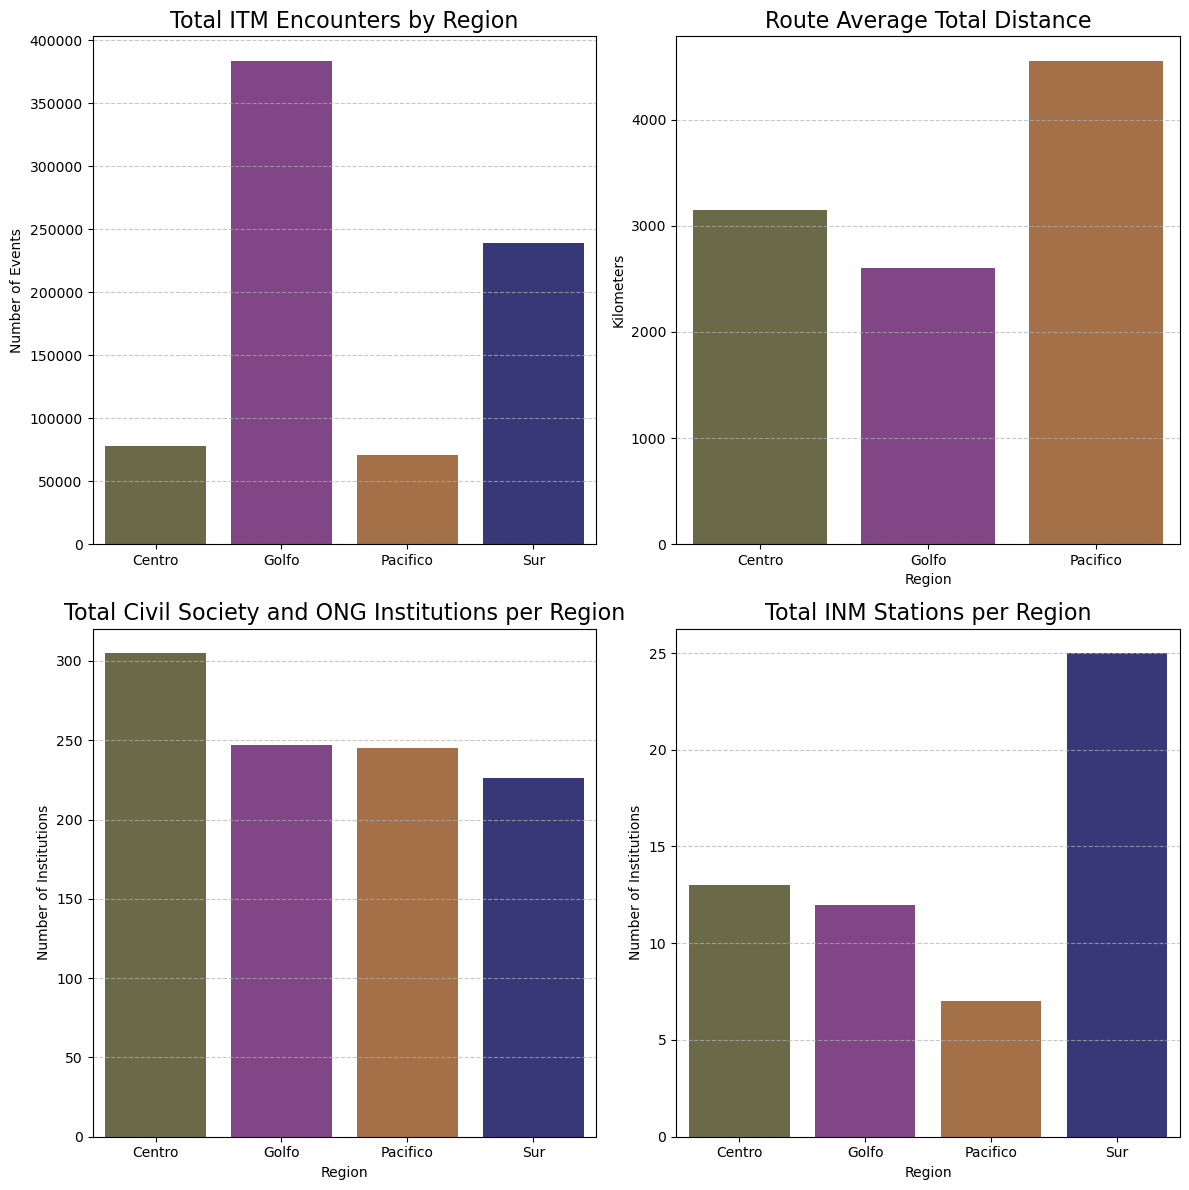

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_5481/2383559589.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_5481/2383559589.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


<Figure size 640x480 with 0 Axes>

In [72]:
# Definir los colores pastel con transparencia para cada región
colors = {
    'Golfo': (138/255, 59/255, 143/255, 0.6),    # Morado
    'Centro': (112/255, 111/255, 66/255, 0.6),   # Verde oliva
    'Pacifico': (178/255, 110/255, 57/255, 0.6), # Naranja
    'Sur': (44/255, 46/255, 131/255, 0.6)        # Azul oscuro
}

# Convertir colores a una paleta de seaborn
palette = [colors[key] for key in sorted(colors.keys())]

# Crear una figura con 4 subplots (2x2)
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Gráfica 1: Total ITM Encounters by Region
events_by_region = values_gdf1.groupby('region')['eventos'].sum().reset_index()
sns.barplot(ax=axs[0, 0], x='region', y='eventos', data=events_by_region, palette=palette)
axs[0, 0].set_title('Total ITM Encounters by Region', fontsize=16)
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Number of Events', fontsize=10)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfica 2: Route Average Distance
arcos_by_region = df_secuencias.groupby('region')['suma_dist'].mean().reset_index()
sns.barplot(ax=axs[0, 1], x='region', y='suma_dist', data=arcos_by_region, palette=palette)
axs[0, 1].set_title('Route Average Total Distance', fontsize=16)
axs[0, 1].set_xlabel('Region', fontsize=10)
axs[0, 1].set_ylabel('Kilometers')
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfica 3: SC
scbyregion = sc.groupby('region').size().reset_index(name='count')
sns.barplot(ax=axs[1, 0], x='region', y='count', data=scbyregion, palette=palette)
axs[1, 0].set_title('Total Civil Society and ONG Institutions per Region', fontsize=16)
axs[1, 0].set_xlabel('Region', fontsize=10)
axs[1, 0].set_ylabel('Number of Institutions', fontsize=10)
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfica 4: INM
inmbyregion = inm.groupby('region').size().reset_index(name='count')
sns.barplot(ax=axs[1, 1], x='region', y='count', data=inmbyregion, palette=palette)
axs[1, 1].set_title('Total INM Stations per Region', fontsize=16)
axs[1, 1].set_xlabel('Region', fontsize=10)
axs[1, 1].set_ylabel('Number of Institutions', fontsize=10)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el layout para que no se solapen las gráficas
plt.tight_layout()
plt.show()



# Ajustar los ticks de los ejes
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


# Ajustar el layout para que no haya solapamiento
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# Mostrar el gráfico
plt.show()

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_5481/4209269261.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0], x='region', y='eventos', data=events_by_region, palette=palette)
/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_5481/4209269261.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[1], x='region', y='suma_dist', data=arcos_by_region, palette=palette)
/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_5481/4209269261.py:29: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(ax=axs[1], x='region', y='suma_dist', data=arcos_by_region, palette=palette)
/var/folders/68/6zkv8z

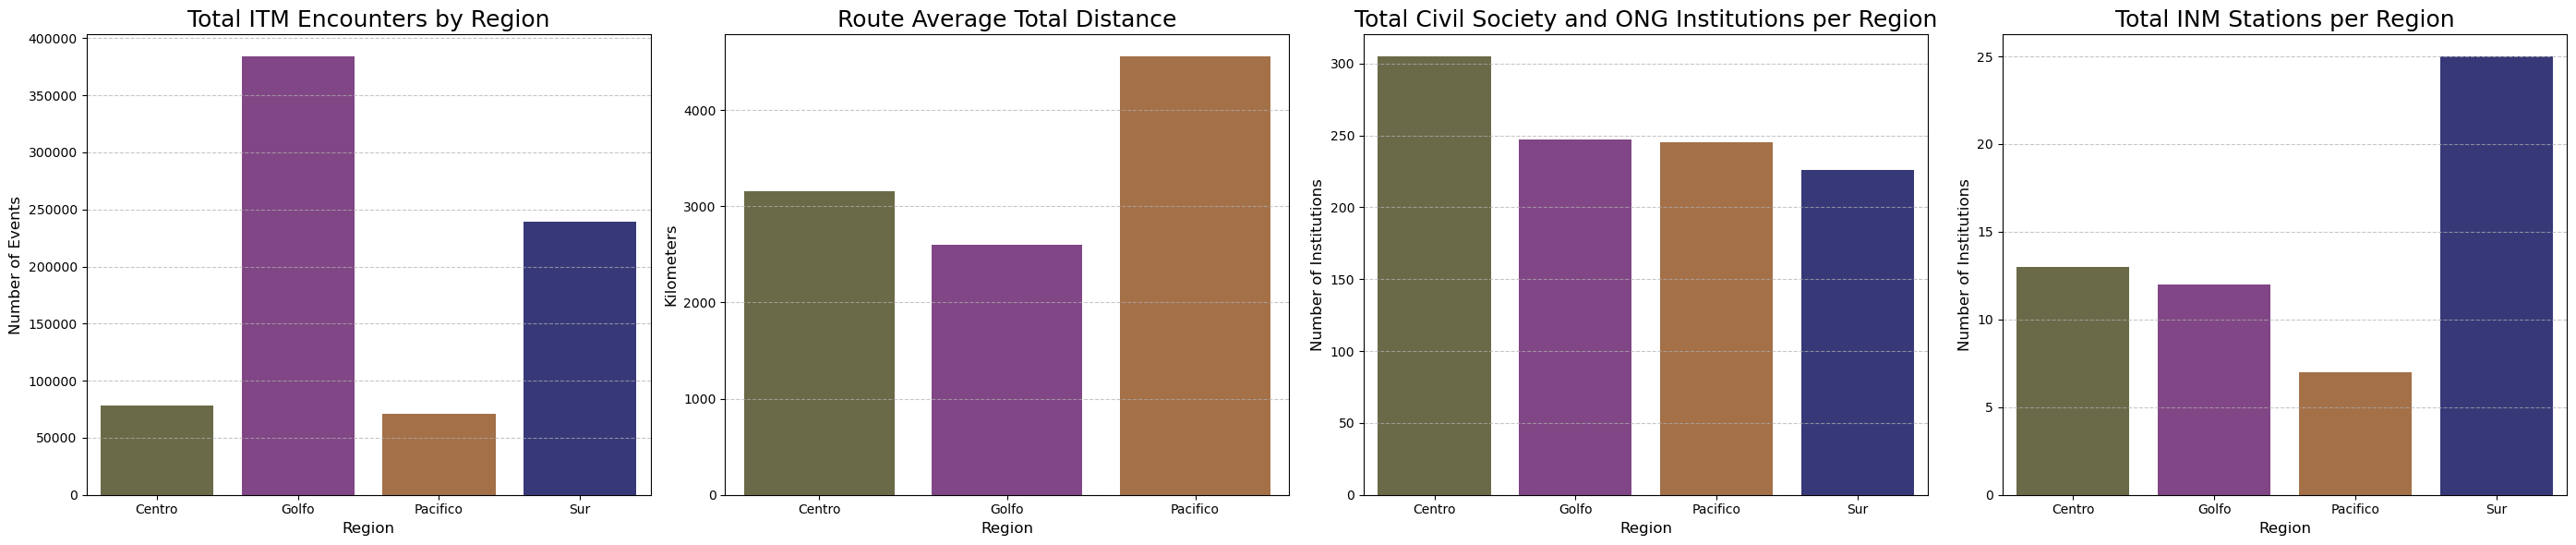

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir los colores pastel con transparencia para cada región
colors = {
    'Golfo': (138/255, 59/255, 143/255, 0.6),    # Morado
    'Centro': (112/255, 111/255, 66/255, 0.6),   # Verde oliva
    'Pacifico': (178/255, 110/255, 57/255, 0.6), # Naranja
    'Sur': (44/255, 46/255, 131/255, 0.6)        # Azul oscuro
}

# Convertir colores a una paleta de seaborn
palette = [colors[key] for key in sorted(colors.keys())]

# Crear una figura con 4 subplots horizontalmente
fig, axs = plt.subplots(1, 4, figsize=(28, 6))

# Gráfica 1: Total ITM Encounters by Region
events_by_region = values_gdf1.groupby('region')['eventos'].sum().reset_index()
sns.barplot(ax=axs[0], x='region', y='eventos', data=events_by_region, palette=palette)
axs[0].set_title('Total ITM Encounters by Region', fontsize=18)
axs[0].set_xlabel('Region', fontsize=12)
axs[0].set_ylabel('Number of Events', fontsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfica 2: Route Average Distance
arcos_by_region = df_secuencias.groupby('region')['suma_dist'].mean().reset_index()
sns.barplot(ax=axs[1], x='region', y='suma_dist', data=arcos_by_region, palette=palette)
axs[1].set_title('Route Average Total Distance', fontsize=18)
axs[1].set_xlabel('Region', fontsize=12)
axs[1].set_ylabel('Kilometers', fontsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfica 3: SC
scbyregion = sc.groupby('region').size().reset_index(name='count')
sns.barplot(ax=axs[2], x='region', y='count', data=scbyregion, palette=palette)
axs[2].set_title('Total Civil Society and ONG Institutions per Region', fontsize=18)
axs[2].set_xlabel('Region', fontsize=12)
axs[2].set_ylabel('Number of Institutions', fontsize=12)
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfica 4: INM
inmbyregion = inm.groupby('region').size().reset_index(name='count')
sns.barplot(ax=axs[3], x='region', y='count', data=inmbyregion, palette=palette)
axs[3].set_title('Total INM Stations per Region', fontsize=18)
axs[3].set_xlabel('Region', fontsize=12)
axs[3].set_ylabel('Number of Institutions', fontsize=12)
axs[3].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el layout para que no se solapen las gráficas
plt.tight_layout()
plt.show()


## secuencias incorrectas, arregladon 12 de mayo

In [ ]:
import networkx as nx

# Crear un grafo dirigido
G = nx.DiGraph()
for sequence in df_secuencias['Filtered_Secuencias']:
    nodes = sequence.split(', ')
    for i in range(len(nodes)-1):
        G.add_edge(nodes[i], nodes[i+1])

# Usar algoritmos de grafos para identificar caminos o subgrafos faltantes
# nx.shortest_path(G, source, target) podría ayudarte a encontrar caminos faltantes entre nodos conocidos


In [ ]:
import matplotlib.pyplot as plt

# Dibujar el grafo
pos = nx.spring_layout(G)  # Layout para una visualización agradable
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='#FF5733')
plt.show()


### metodologia para agregar nuevas rutas:

1) integramos inicios faltantes, en este caso faltaban los de la peninsula  se puede hacer directamente en la df original

In [ ]:
# df inicios faltantes

df_inicios_faltantes = df_secuencias[['ID_Ruta', 'Filtered_Secuencias']]

df_inicios_faltantes.head()

In [ ]:

nuevos_inicios_conectores = [
    {'nuevo_inicio': 'PG1810', 'conector': 'PG1769'},
    {'nuevo_inicio': 'PG1850, PG1811, PG1810', 'conector': 'PG1769'},
    {'nuevo_inicio': 'PG1850, PG1811, PG1772, PG1694, PG1654, PG1614', 'conector': 'PG1574'},
    {'nuevo_inicio': 'PG1695, PG1694, PG1654, PG1614', 'conector': 'PG1574'}
]

# Función para agregar los nuevos inicios a las secuencias que contienen los conectores
def agregar_inicios(df, inicios_conectores):
    nuevas_secuencias = []

    for inicio_conector in inicios_conectores:
        nuevo_inicio = inicio_conector['nuevo_inicio']
        conector = inicio_conector['conector']
        
        for secuencia in df['Filtered_Secuencias']:
            if conector in secuencia:
                # Dividir la secuencia por el conector
                partes = secuencia.split(', ')
                indice_conector = partes.index(conector)
                # Crear la nueva secuencia reemplazando la parte anterior al conector por el nuevo inicio
                nueva_secuencia = f"{nuevo_inicio}, {conector}, " + ', '.join(partes[indice_conector + 1:])
                nuevas_secuencias.append(nueva_secuencia)
    
    # Crear un nuevo DataFrame con las secuencias duplicadas y actualizadas
    df_nuevas_secuencias = pd.DataFrame({'Filtered_Secuencias': nuevas_secuencias})
    return pd.concat([df, df_nuevas_secuencias], ignore_index=True)

# Aplicar la función para agregar los nuevos inicios
df_actualizado = agregar_inicios(df_inicios_faltantes, nuevos_inicios_conectores)

# Mostrar el DataFrame actualizado
print(df_actualizado)


In [ ]:
df_actualizado

In [ ]:
# Filtrar los ID_Ruta que comienzan con 'RG' y no son NaN
df_rg = df_secuencias[df_secuencias['ID_Ruta'].str.startswith('RG', na=False)]

# Obtener el último número usado en los ID_Ruta con prefijo 'RG'
ultimo_numero_rg = df_rg['ID_Ruta'].str.extract(r'(\d+)$').astype(int).max().values[0]

# Filtrar las filas con NaN en ID_Ruta
df_nan = df_secuencias[df_secuencias['ID_Ruta'].isna()]

# Generar los nuevos ID_Ruta
nuevos_ids = [f"RG{str(i).zfill(4)}" for i in range(ultimo_numero_rg + 1, ultimo_numero_rg + 1 + len(df_nan))]

# Asignar los nuevos ID_Ruta a las filas con NaN
df_secuencias.loc[df_secuencias['ID_Ruta'].isna(), 'ID_Ruta'] = nuevos_ids

# Mostrar el DataFrame actualizado
print(df_secuencias)

### integraciones de arcos (intermedios) faltantes en rutas

1) crear nuevos inicios, vamos a definir un nuevo set de nuevos inicios en una ubicacion diferente al original. vamos a filtrar usando la columna ID_Ruta, todas las filas que tengan en su id el prefijo seleccionado y despues vamos a extraer de todas las secuencias disponibles que contengan determinado conector en una nueva lista diferente a la base de datos original. a estos duplicados se remplazara la parte posterior al conector por una nueva secuencia.

2) el paso dos es la misma logica que el ejercicio anterior.tenemos la df: df_general y tenemos una nueva lista de inicios diferentes que acabamos de generar, las cuales usaremos con un nuevo conector target el cual duplicaremos y remplazaremos en la fila duplicada la parte antes de cada conector por cada nuevo inicio de nuestra lista.

#### Ciudad Top (Detenciones)

Filtramos el df de manera que nos quede la ciudad con mas detenciones de cada grid

#### Aqui tenemos que tomar la decision de como sacar el punto de referencia para asignar el valor de cada ruta:

    a) Agrupamos por 'ID_Poligono' y encontramos la ciudad con el máximo número de 'detenciones' para cada grupo
    b) Agrupamos por 'ID_Poligono' y sacamos el promedio de 'detenciones' de todas las ciudades para cada grupo
    
  R: Aplicaremos metodo de promedio

In [ ]:
# Agrupamos por 'ID_Poligono' y encontramos la ciudad con el máximo número de 'detenciones' para cada grupo
ciudades_top_valores = dfvalores.loc[dfvalores.groupby('ID_Poligono')['eventos'].idxmax()]

# Calcular el promedio de detenciones para cada 'ID_Poligono' y redondearlo sin decimales
promedio_detenciones = dfvalores.groupby('ID_Poligono')['eventos'].mean().round(0)

# Resetear el índice si es necesario
ciudades_top_valores.reset_index(drop=True, inplace=True)

# Agregar la columna 'promedio_detenciones' al DataFrame resultante
ciudades_top_valores['promedio_eventos'] = ciudades_top_valores['ID_Poligono'].map(promedio_detenciones)

# Mostramos las primeras filas del nuevo DataFrame para verificar
print(ciudades_top_valores.head())




In [ ]:
ciudades_top_valores.head(60)

## Metricas de Vulnerabilidad

In [ ]:

combined_rutas = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv")




In [ ]:
combined_rutas

In [ ]:
# Save the DataFrame to the CSV file
combined_rutas.to_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv", index=False)


In [ ]:
def create_arc_sequence(secuencia):
    # Split the sequence into individual IDs
    ids = secuencia.split(', ')
    # Create arcs by pairing consecutive IDs
    arcs = [f'{ids[i]}-{ids[i+1]}' for i in range(len(ids) - 1)]
    return ', '.join(arcs)


In [ ]:
combined_rutas['Arc_Sequences'] = combined_rutas['Filtered_Secuencias'].apply(create_arc_sequence)


In [ ]:
combined_rutas

### generacion de arcos

In [ ]:
values_df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.csv')


In [ ]:
import pandas as pd
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim
from unidecode import unidecode
import unidecode
import numpy as np
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
#arc_df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv')

### dato de distancias a pie y tiempo

In [ ]:
def calculate_totals(row, df):
    total_distance = 0
    total_duration = 0
    # Iterate through each tuple in the transformed sequences
    for pair in row['Transformed_Sequences']:
        # Filter sorted_df for rows matching the current pair
        matching_rows = df[df['Node_Pair'] == pair]
        total_distance += matching_rows['Distance_km'].sum()
        total_duration += matching_rows['Duration_hr'].sum()
    return pd.Series([total_distance, total_duration])

# Apply the function to df_unique
df_unique[['Total_Distance_km', 'Total_Duration_hr']] = df_unique.apply(calculate_totals, args=(sorted_df,), axis=1)


###
tengo que eliminar grids que no son nodos, para esto podemos tomar secuencias_diferentes y df valores, y de secuencias diferentes, quitar todas los codigos de grid que no tengan un valor en df_valores. b)buscar duplicados c) sacar arcos, d) correr distancias y tiempo.

notas:



In [ ]:
combined_rutas = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv")

In [ ]:
valid_ids = set(values_df['ID_Poligono'])

In [ ]:
combined_rutas.head(9)

In [ ]:
# Check for duplicates across all columns
duplicates = combined_rutas.duplicated(keep=False)  # `keep=False` marks all duplicates

# Count total duplicates
total_duplicates = duplicates.sum()

# Print the number of duplicate rows
print(f"Total duplicate rows: {total_duplicates}")

# Optionally, display the duplicate rows
if total_duplicates > 0:
    print("Duplicate rows:")
    print(combined_rutas[duplicates])


In [ ]:
#combined_rutas.to_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Diferentes_1.csv')


### final de filtrado de secuencias

## toca extraer de nuevo los diferentes arcos posibles

In [ ]:
from itertools import combinations

def generate_pairwise_combinations(ids):
    # Split the IDs string into a list if not already a list
    id_list = ids.split(', ') if isinstance(ids, str) else ids
    # Generate all pairwise combinations for the last five IDs
    pairwise_combinations = list(combinations(id_list, 2))
    return pairwise_combinations


In [ ]:
# Split the 'Arc_Sequences' into lists of arcs and explode into separate rows
arc_df12 = combined_rutas['Arc_Sequences'].str.split(', ').explode().reset_index(drop=True).to_frame()

# Rename the column to a more descriptive name
arc_df12.columns = ['Arc']


In [ ]:
# Check for duplicates across all columns
duplicates = arc_df12.duplicated(keep=False)  # `keep=False` marks all duplicates

# Count total duplicates
total_duplicates = duplicates.sum()

# Print the number of duplicate rows
print(f"Total duplicate rows: {total_duplicates}")

# Optionally, display the duplicate rows
if total_duplicates > 0:
    print("Duplicate rows:")
    print(arc_df12[duplicates])


In [ ]:
# Remove duplicates and keep the first occurrence
arc_df12 = arc_df12.drop_duplicates()

# Print the number of rows after removing duplicates
print(f"Total rows after removing duplicates: {len(arc_df12)}")


In [ ]:
values_df

In [ ]:
arc_df12[['From_Node', 'To_Node']] = arc_df12['Arc'].str.split('-', expand=True)


### se tiene que filtrar los datos de values para que no se repitan los arcos por cada ciudad en cada grid



In [ ]:
# Filtrar el DataFrame para quedarse con las filas que tengan el máximo valor de 'eventos' para cada 'ID_Poligono'
filtered_values_df = values_df.loc[values_df.groupby('ID_Poligono')['eventos'].idxmax()]

# Mostrar el DataFrame filtrado
print(filtered_values_df)

In [ ]:
# Merge details for From_Node
arc_df12 = arc_df12.merge(filtered_values_df[['ID_Poligono', 'ciudad', 'latitud', 'longitud', 'eventos']], how='left', left_on='From_Node', right_on='ID_Poligono')
arc_df12.rename(columns={
    'ciudad': 'ciudad_origen',
    'latitud': 'latitud_from',
    'longitud': 'longitud_from',
    'eventos': 'eventos_from'
}, inplace=True)
arc_df12.drop('ID_Poligono', axis=1, inplace=True)

# Merge details for To_Node
arc_df12 = arc_df12.merge(filtered_values_df[['ID_Poligono', 'ciudad', 'latitud', 'longitud', 'eventos']], how='left', left_on='To_Node', right_on='ID_Poligono')
arc_df12.rename(columns={
    'ciudad': 'ciudad_destino',
    'latitud': 'latitud_to',
    'longitud': 'longitud_to',
    'eventos': 'eventos_to'
}, inplace=True)
arc_df12.drop('ID_Poligono', axis=1, inplace=True)


In [ ]:
# Create coordinates
arc_df12['origen_xy'] = arc_df12['latitud_from'].astype(str) + ', ' + arc_df12['longitud_from'].astype(str)
arc_df12['destino_xy'] = arc_df12['latitud_to'].astype(str) + ', ' + arc_df12['longitud_to'].astype(str)

# Calculate total events
arc_df12['eventos_arco'] = arc_df12['eventos_from'] + arc_df12['eventos_to']


In [ ]:
arc_df12

In [ ]:

#arc_df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv')

combined_rutas = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv")



In [ ]:
# Specify the path where you want to save the CSV file
output_path = '/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv'

# Save the DataFrame to a CSV file at the specified path
arc_df12.to_csv(output_path, index=False)


notas:

la distancia juega un papel impportante, y bien podria ser parte de cualquiera de las dos metricas de vulnerabilidad por capacidad institucional, dado la presencia de asistencia en el centroide sobre la distancia entre un punto y otro

la presencia de asistencia a lo largo del arco total

### continuamos:

en este putno debemos tener nuestras df:

rutas_combinaciones[filtered secuences, arc codes que lo integran,]

arc_df[arcs, ciudad origen, ciudad destino, coords origen_xy, destino_xy, eventos arco] 

y vamos a sacar la polilínea codificada, tiempo y distancia. listo para meter a arcgis




## rutas polygonos arcos

Consulta a la API de Google Maps: Para cada par de puntos de origen y destino, realizar una consulta para obtener la ruta a pie, incluyendo la polilínea codificada, tiempo y distancia.


Decodificar y almacenar las polilíneas: Decodificar cada polilínea codificada obtenida y almacenarla en tu DataFrame.


Convertir a GeoDataFrame: Convertir el DataFrame actualizado en un GeoDataFrame.


Guardar y visualizar: Opcionalmente, guardar el GeoDataFrame y preparar todo para visualización en ArcGIS Pro.

In [ ]:
df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv')

In [ ]:
import pandas as pd
import requests
import polyline
from shapely.geometry import LineString
import geopandas as gpd

In [ ]:
import requests
import pandas as pd
from shapely.geometry import LineString
import googlemaps
from shapely import wkt

In [ ]:
# Configuración de API Key
api_key = 'xxx'

In [ ]:
import requests
import pandas as pd
from shapely.geometry import LineString
import polyline

# Función para convertir distancias a kilómetros
def convert_distance_to_km(distance):
    if distance is None:
        return None
    if 'km' in distance:
        return float(distance.replace(' km', ''))
    elif 'mi' in distance:
        return float(distance.replace(' mi', '')) * 1.60934  # Conversión de millas a kilómetros
    else:
        return None

# Función para convertir duraciones a minutos
def convert_duration_to_minutes(duration):
    if duration is None:
        return None
    days = 0
    hours = 0
    minutes = 0
    if 'day' in duration:
        days_part = duration.split(' day')[0]
        days = int(days_part.split()[-1])
        duration = duration.split(' day')[1]
    if 'hour' in duration:
        hours_part = duration.split(' hour')[0]
        hours = int(hours_part.split()[-1])
        duration = duration.split(' hour')[1]
    if 'min' in duration:
        minutes_part = duration.split(' min')[0]
        minutes = int(minutes_part.split()[-1])
    return days * 24 * 60 + hours * 60 + minutes

# Función para obtener la ruta y la polilínea, y convertir las distancias y duraciones a formatos numéricos
def obtener_ruta_y_polilinea(row, api_key):
    #base_url = "https://maps.googleapis.com/maps/api/directions/json"
    params = {
        'origin': f"{row['latitud_from']},{row['longitud_from']}",  # Asegúrate de que los nombres de columnas coincidan
        'destination': f"{row['latitud_to']},{row['longitud_to']}",
        'mode': 'walking',  # Modo a pie
        'key': api_key
    }
    response = requests.get(base_url, params=params)
    result = response.json()

    if result['status'] == 'OK':
        polyline_encoded = result['routes'][0]['overview_polyline']['points']
        distancia = result['routes'][0]['legs'][0]['distance']['text']
        duracion = result['routes'][0]['legs'][0]['duration']['text']
        puntos = polyline.decode(polyline_encoded)
        geometry = LineString(puntos)

        # Convertir distancia y duración a formatos numéricos
        distancia_km = convert_distance_to_km(distancia)
        duracion_min = convert_duration_to_minutes(duracion)

        return geometry.wkt, distancia, duracion, distancia_km, duracion_min  # Devolver como WKT
    else:
        return None, None, None, None, None

# Aplicar a cada fila del DataFrame y expandir los resultados en nuevas columnas
df[['geometry', 'distance', 'duration', 'distance_km', 'duration_min']] = df.apply(
    lambda row: obtener_ruta_y_polilinea(row, api_key), axis=1, result_type='expand'
)

# Mostrar el DataFrame para verificar los resultados
#print(df)




In [ ]:
# Elimina las columnas existentes
#df = df.drop(columns=['geometry'])#,'distance', 'duration', 'distance_km', 'duration_min'])

In [ ]:
# Lista de columnas para mantener
columnas_para_mantener = ['Arc', 'ciudad_origen', 'ciudad_destino', 'eventos_arco', 'geometry', 'distance', 'duration', 'distance_km', 'duration_min']

# Eliminar todas las columnas que no están en la lista de columnas para mantener
df_filtrado = df[columnas_para_mantener]


In [ ]:
arc_df = df_filtrado

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(arc_df['distance_km'], arc_df['duration_min'], alpha=0.5)
plt.title('Scatter Plot of Distance vs. Duration')
plt.xlabel('Distance in Kilometers')
plt.ylabel('Duration in Hours')
plt.grid(True)
plt.show()

In [ ]:
#### Calculate IQR
Q1 = arc_df[['distance_km', 'duration_min']].quantile(0.25)
Q3 = arc_df[['distance_km', 'duration_min']].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those beyond 1.5 times the IQR from the quartiles
outliers = arc_df[((arc_df['distance_km'] < (Q1['distance_km'] - 1.5 * IQR['distance_km'])) | (arc_df['distance_km'] > (Q3['distance_km'] + 1.5 * IQR['distance_km'])) |
                   (arc_df['duration_min'] < (Q1['duration_min'] - 1.5 * IQR['duration_min'])) | (arc_df['duration_min'] > (Q3['duration_min'] + 1.5 * IQR['duration_min'])))]
print("Detected Outliers:")
print(outliers[['Arc', 'distance_km', 'duration_min']])

In [ ]:
arc_df

In [ ]:
#df_filtrado.to_file("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.geojson", driver='GeoJSON')
#arc_df.to_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.csv")


In [ ]:
# Convertir la columna 'geometry' de WKT a objetos shapely
arc_df['geometry'] = arc_df['geometry'].apply(wkt.loads)

# Convertir el DataFrame en un GeoDataFrame
arc_gdf = gpd.GeoDataFrame(arc_df, geometry='geometry')

# Definir el sistema de coordenadas WGS84
arc_gdf.set_crs(epsg=4326, inplace=True)

# Guardar como shapefile
#arc_gdf.to_file("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.shp")

In [ ]:
arc_df= pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.csv")

In [ ]:
# Verificar que todos los valores en la columna 'geometry' son válidos
def is_valid_linestring(geometry):
    try:
        # Verificar si ya es un objeto LineString
        if isinstance(geometry, LineString):
            return geometry.is_valid
        # Convertir el valor de geometry a un objeto shapely
        geom = wkt.loads(geometry)
        return geom.is_valid
    except Exception as e:
        print(f"Error en la geometría: {e}")
        return False

arc_df['valid_geometry'] = arc_df['geometry'].apply(is_valid_linestring)

# Filtrar filas con geometrías no válidas
invalid_geometries = arc_df[~arc_df['valid_geometry']]

# Mostrar filas con geometrías no válidas
print("Filas con geometrías no válidas:")
print(invalid_geometries)

# Convertir la columna 'geometry' a objetos shapely si aún no lo están
def convert_to_linestring(geometry):
    if isinstance(geometry, LineString):
        return geometry
    return wkt.loads(geometry)

arc_df['geometry'] = arc_df['geometry'].apply(convert_to_linestring)

# Crear un GeoDataFrame a partir del DataFrame
gdf = gpd.GeoDataFrame(arc_df, geometry='geometry')

# Comprobar si hay geometrías inválidas en el GeoDataFrame
invalid_gdf = gdf[~gdf.is_valid]

# Mostrar filas con geometrías inválidas en el GeoDataFrame
print("Filas con geometrías inválidas en el GeoDataFrame:")
print(invalid_gdf)

# Intentar trazar las geometrías
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', edgecolor='black')
plt.show()

#### notas
las coordenadas de las rutas (polyline) salen al reves lol
estan al reves lol


## segmentacion y asignacion de valores a polyline

In [1]:
import pandas as pd
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim
from unidecode import unidecode
import unidecode
import numpy as np
from shapely.geometry import Point, Polygon
import geopandas as gpd


import matplotlib.pyplot as plt

In [ ]:
arc_df = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.csv")

In [ ]:
arc_df_2 = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv")

In [ ]:
mx_mun = gpd.read_file('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/areas/df_final_shape.shp').to_crs(epsg=4485)

In [ ]:
arc_gdf

In [ ]:
import pandas as pd
import geopandas as gpd


# mx_mun = pd.read_csv('path_to_your_file.csv')  # Cargar tu dataframe original si está en un archivo CSV

# Crear un nuevo DataFrame con las columnas necesarias
df_pivot = mx_mun.pivot_table(index=['Entidad', 'Municipio', 'Cve. Munic', 'NOMEDO', 'NOM_MUN', 'Area', 'geometry'],
                              columns='Etiqueta', values='Total deli', fill_value=0).reset_index()

# Renombrar las columnas para que sean más manejables y cumplan con la restricción de 10 caracteres
df_pivot.columns = ['Entidad', 'Municipio', 'CveMunic', 'NOMEDO', 'NOMMUN', 'Area', 'geometry',
                    'Corrupcion', 'CrimenOrg', 'Violencia']

# Mostrar el resultado
print(df_pivot.head())

# Convertir de nuevo a GeoDataFrame
mx_mun_transformed = gpd.GeoDataFrame(df_pivot, geometry='geometry')

# Guardar o utilizar mx_mun_transformed para tus siguientes pasos


In [ ]:
# Guardar el GeoDataFrame df_pivot en el path especificado
#output_path = '/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/areas/municipios/municipiosshp.shp'
#df_pivot.to_file(output_path)

# Eliminar la columna "centroide_xy"
#segmentos = segmentos.drop(columns=["centroide_xy"])

# Guardar el GeoDataFrame en el path especificado
#output_path = "/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/segmentos/segmentos.shp"
#segmentos.to_file(output_path)


In [ ]:
df_pivot = gpd.GeoDataFrame(df_pivot, geometry='geometry')
segmentos = gpd.GeoDataFrame(segmentos, geometry='geometry')

df_pivot = df_pivot.set_crs(epsg=4326)  # Ejemplo de CRS, ajústalo según sea necesario
segmentos = segmentos.set_crs(epsg=4326)  # Asegúrate de que el CRS sea el mismo

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Función para invertir las coordenadas de un punto
def invertir_coordenadas(geom):
    if geom and geom.geom_type == 'Point':
        return Point(geom.y, geom.x)
    return geom

# Aplicar la función a la columna 'geometry' de 'segmentos'
segmentos['geometry'] = segmentos['geometry'].apply(invertir_coordenadas)

# Asegurarse de que el CRS sigue siendo el mismo
segmentos = segmentos.set_crs(epsg=4326)

# Verificar los cambios
print(segmentos.head())

# Plotear los GeoDataFrames con coordenadas corregidas
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df_pivot.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5, label='DF Pivot')
segmentos.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label='Segmentos')
plt.legend()
plt.title('Map of DF Pivot and Segmentos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()


In [ ]:
# Realizamos la unión espacial
joined = gpd.sjoin(segmentos, df_pivot[['geometry', 'Corrupcion', 'CrimenOrg', 'Violencia']], how='left', op='within')

# Verificamos los resultados
print(joined.head())


In [ ]:
# Asegurarse de que los GeoDataFrames tienen el mismo CRS
df_pivot = df_pivot.to_crs(epsg=4326)
arc_gdf = arc_gdf.to_crs(epsg=4326)

# Crear una lista para almacenar las nuevas filas
poligonos_intersectados = []

# Iterar a través de cada arco en arc_gdf
for index, row in arc_gdf.iterrows():
    arc_line = row['geometry']
    arc_id = row['Arc']
    
    # Encontrar los polígonos que intersectan con la línea del arco
    intersecting_polygons = df_pivot[df_pivot.intersects(arc_line)]
    
    for _, poly_row in intersecting_polygons.iterrows():
        # Crear una nueva fila para cada polígono intersectado
        nuevo_poligono = {
            'Arc': arc_id,
            'Municipio': poly_row['Municipio'],
            'Corrupcion': poly_row['Corrupcion'],
            'CrimenOrg': poly_row['CrimenOrg'],
            'Violencia': poly_row['Violencia'],
            'geometry': poly_row['geometry']
        }
        # Agregar el nuevo polígono a la lista
        poligonos_intersectados.append(nuevo_poligono)

# Crear un DataFrame con las nuevas filas
poligonos_intersectados_df = pd.DataFrame(poligonos_intersectados)
poligonos_intersectados_gdf = gpd.GeoDataFrame(poligonos_intersectados_df, geometry='geometry', crs='EPSG:4326')

# Verificar los resultados
print(poligonos_intersectados_gdf.head())


In [ ]:
# Asegurarse de que el GeoDataFrame esté en un CRS proyectado antes de calcular los centroides
poligonos_intersectados_gdf = poligonos_intersectados_gdf.to_crs(epsg=3857)

# Convertir los polígonos a sus centroides
poligonos_intersectados_gdf['geometry'] = poligonos_intersectados_gdf.centroid

# Volver al CRS original
poligonos_intersectados_gdf = poligonos_intersectados_gdf.to_crs(epsg=4326)



In [ ]:
poligonos_intersectados_gdf

In [ ]:
# Asegurarse de que ambos GeoDataFrames tengan el mismo CRS (EPSG:4326)
joined = joined.to_crs(epsg=4326)
poligonos_intersectados_gdf = poligonos_intersectados_gdf.to_crs(epsg=4326)

# Primero, unimos joined con df_pivot para agregar las columnas Corrupcion, CrimenOrg, y Violencia
joined = gpd.sjoin(joined, df_pivot[['geometry', 'Corrupcion', 'CrimenOrg', 'Violencia']], how='left', op='within')

# Eliminar columna index_right agregada por la unión espacial
joined = joined.drop(columns=['index_right'])

# Añadir columna 'Tipo' a poligonos_intersectados_gdf
poligonos_intersectados_gdf['Tipo'] = 'intermedio'

# Combinar los dos GeoDataFrames
combined_gdf = pd.concat([joined, poligonos_intersectados_gdf], ignore_index=True)

# Ordenar las filas dentro de cada arco
def ordenar_filas_por_arco(df):
    sorted_dfs = []
    for arc_id in df['Arc'].unique():
        arc_df = df[df['Arc'] == arc_id]
        # Ordenar por tipo (origen primero, intermedio después, destino al final)
        arc_df = arc_df.sort_values(by=['Tipo', 'geometry'], key=lambda col: col.map({'origen': 0, 'intermedio': 1, 'destino': 2}))
        sorted_dfs.append(arc_df)
    return pd.concat(sorted_dfs, ignore_index=True)

# Ordenar el GeoDataFrame combinado
combined_gdf_sorted = ordenar_filas_por_arco(combined_gdf)

# Copiar valores originales de 'distance_t' y 'duration_t' a todas las filas del mismo arco
for arc_id in combined_gdf_sorted['Arc'].unique():
    arc_df = combined_gdf_sorted[combined_gdf_sorted['Arc'] == arc_id]
    distance_value = arc_df[arc_df['Tipo'] == 'origen']['distance_t'].values[0]
    duration_value = arc_df[arc_df['Tipo'] == 'origen']['duration_t'].values[0]
    combined_gdf_sorted.loc[combined_gdf_sorted['Arc'] == arc_id, 'distance_t'] = distance_value
    combined_gdf_sorted.loc[combined_gdf_sorted['Arc'] == arc_id, 'duration_t'] = duration_value



In [ ]:
# Eliminar filas intermedias con el mismo municipio que el de origen o destino
def eliminar_intermedios_duplicados(df):
    filtered_dfs = []
    for arc_id in df['Arc'].unique():
        arc_df = df[df['Arc'] == arc_id]
        municipios_origen_destino = arc_df[arc_df['Tipo'].isin(['origen', 'destino'])]['Municipio'].unique()
        arc_df = arc_df[~((arc_df['Tipo'] == 'intermedio') & (arc_df['Municipio'].isin(municipios_origen_destino)))]
        filtered_dfs.append(arc_df)
    return pd.concat(filtered_dfs, ignore_index=True)

combined_gdf_sorted = eliminar_intermedios_duplicados(combined_gdf_sorted)

# Verificar los resultados
print(combined_gdf_sorted.head(20))

In [ ]:
# Eliminar las columnas 'dur_ori' y 'dur_des'
#combined_gdf_sorted = combined_gdf_sorted.drop(columns=['dur_ori', 'dur_des'])

# Verificar los resultados
#print(combined_gdf_sorted.head(20))

In [ ]:
combined_gdf_sorted

In [ ]:
# Guardar el resultado en un archivo para su posterior análisis
#combined_gdf_sorted.to_file("/Users/pablouriaarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/segmentos/segmentos.shp")

In [ ]:
import pandas as pd
import geopandas as gpd
import googlemaps
from shapely.geometry import Point
import time

In [ ]:
# Configuración de API Key
api_key = 'xxx'

In [ ]:
# Definir una función para calcular la distancia y duración entre dos puntos
def calcular_distancia_duracion(origen, destino):
    try:
        # Invertir coordenadas: latitud primero, longitud segundo
        origen_coords = (origen.y, origen.x)
        destino_coords = (destino.y, destino.x)
        
        result = gmaps.distance_matrix(origins=[origen_coords], destinations=[destino_coords], mode='walking')
        if result['rows'][0]['elements'][0]['status'] == 'OK':
            distancia = result['rows'][0]['elements'][0]['distance']['value'] / 1000  # Convertir metros a kilómetros
            duracion = result['rows'][0]['elements'][0]['duration']['value'] / 60  # Convertir segundos a minutos
            return distancia, duracion
        else:
            print(f"Error en la API de Google Maps para {origen_coords} a {destino_coords}: {result['rows'][0]['elements'][0]['status']}")
            return None, None
    except Exception as e:
        print(f"Excepción al consultar la API de Google Maps: {e}")
        return None, None

# Inicializar nuevas columnas en el DataFrame
combined_gdf_sorted['dist_ori'] = None
combined_gdf_sorted['dist_des'] = None
combined_gdf_sorted['dur_ori'] = None
combined_gdf_sorted['dur_des'] = None

# Iterar a través de cada arco y calcular las distancias y duraciones
for arc_id in combined_gdf_sorted['Arc'].unique():
    arc_df = combined_gdf_sorted[combined_gdf_sorted['Arc'] == arc_id]
    
    origen = arc_df[arc_df['Tipo'] == 'origen']['geometry'].values[0]
    destino = arc_df[arc_df['Tipo'] == 'destino']['geometry'].values[0]
    
    for index, row in arc_df.iterrows():
        punto_intermedio = row['geometry']
        
        dist_ori, dur_ori = calcular_distancia_duracion(origen, punto_intermedio)
        dist_des, dur_des = calcular_distancia_duracion(destino, punto_intermedio)
        
        combined_gdf_sorted.at[index, 'dist_ori'] = dist_ori
        combined_gdf_sorted.at[index, 'dist_des'] = dist_des
        combined_gdf_sorted.at[index, 'dur_ori'] = dur_ori
        combined_gdf_sorted.at[index, 'dur_des'] = dur_des

        # Esperar un momento para evitar exceder la cuota de la API
        time.sleep(0.1)

# Convertir las columnas a tipo float
combined_gdf_sorted['dist_ori'] = combined_gdf_sorted['dist_ori'].astype(float)
combined_gdf_sorted['dist_des'] = combined_gdf_sorted['dist_des'].astype(float)
combined_gdf_sorted['dur_ori'] = combined_gdf_sorted['dur_ori'].astype(float)
combined_gdf_sorted['dur_des'] = combined_gdf_sorted['dur_des'].astype(float)

# Verificar los resultados
print(combined_gdf_sorted.head(20))


In [ ]:
# Asegurarse de que las columnas tienen el mismo nombre antes de la combinación
#values_df.rename(columns={'ciudad': 'Ciudad'}, inplace=True)

# Realizar la combinación basada en la columna 'Ciudad'
#combined_gdf_sorted = combined_gdf_sorted.merge(values_df[['Ciudad', 'inm_30km', 'sc_30km']], on='Ciudad', how='left')

# Verificar los resultados
#print(combined_gdf_sorted.head(20))

In [ ]:
# Guardar el resultado en un archivo para su posterior análisis
#combined_gdf_sorted.to_file("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/segmentos/segmentos.shp")

In [64]:
segmentos = gpd.read_file('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/segmentos/segmentos.shp').to_crs(epsg=4485)

segmentos.head(2)


,Arc,Ciudad,Tipo,Municipio,distancia_,duration_t,Corrupcion,CrimenOrg,CrimMujer,dist_ori,...,dur_ori,dur_des,institucio,vulnerabil,vulnerab_1,vulnerab_2,codigo_uni,distance_k,region,geometry
0,PG1529-PG1530,"Suchiate, Chiapas",origen,Suchiate,35.6,488.0,0.0,4.0,7.0,0.000,...,0.000000,472.916667,3.0,0.000359,0.0,0.000359,S-PG1529-1,4.7,Sur,POINT (2552391.749 1704801.661)
1,PG1529-PG1530,0,intermedio,Frontera Hidalgo,35.6,488.0,0.0,1.0,1.0,18.038,...,245.083333,305.783333,0.0,0.000000,0.0,0.000000,None,0.0,Desconocido,POINT (2554242.062 1718959.437)


In [65]:
segmentos.head(2)

,Arc,Ciudad,Tipo,Municipio,distancia_,duration_t,Corrupcion,CrimenOrg,CrimMujer,dist_ori,...,dur_ori,dur_des,institucio,vulnerabil,vulnerab_1,vulnerab_2,codigo_uni,distance_k,region,geometry
0,PG1529-PG1530,"Suchiate, Chiapas",origen,Suchiate,35.6,488.0,0.0,4.0,7.0,0.000,...,0.000000,472.916667,3.0,0.000359,0.0,0.000359,S-PG1529-1,4.7,Sur,POINT (2552391.749 1704801.661)
1,PG1529-PG1530,0,intermedio,Frontera Hidalgo,35.6,488.0,0.0,1.0,1.0,18.038,...,245.083333,305.783333,0.0,0.000000,0.0,0.000000,None,0.0,Desconocido,POINT (2554242.062 1718959.437)


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

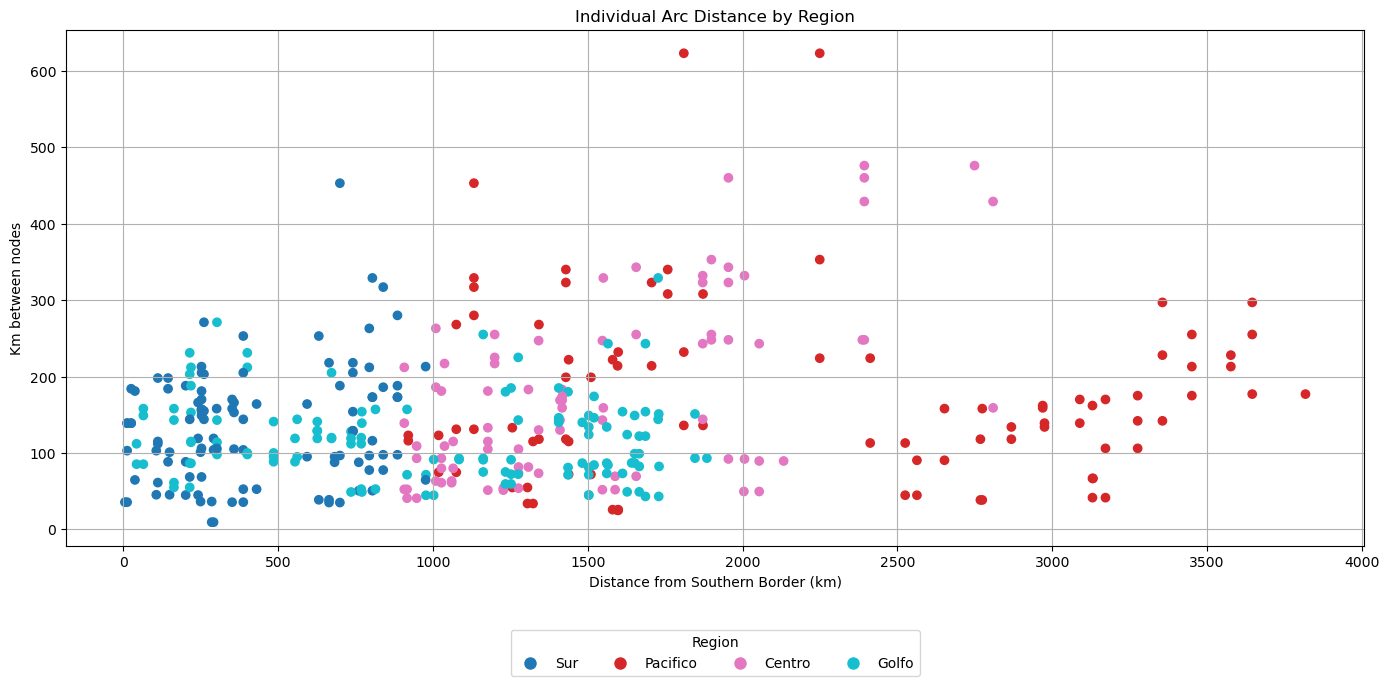

In [67]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtrar los datos para omitir los que tienen 'Desconocido' en la columna 'region'
segmentos_filtered = segmentos[segmentos['region'] != 'Desconocido']

# Obtener los valores únicos de la columna 'region'
unique_regions = segmentos_filtered['region'].unique()

# Crear un mapa de colores basado en el número de regiones únicas
colormap = plt.cm.get_cmap('tab10', len(unique_regions))

# Crear un diccionario para asignar un color a cada región
region_colors = {region: colormap(i) for i, region in enumerate(unique_regions)}

# Asignar colores a cada punto basado en su 'region'
colors = segmentos_filtered['region'].map(region_colors)

# Configurar el tamaño de la figura según sea necesario
plt.figure(figsize=(14, 7))

# Crear el scatter plot
plt.scatter(segmentos_filtered['distance_k'], segmentos_filtered['distancia_'], c=colors, marker='o', label='Total Vulnerability by Region')

# Añadir detalles al gráfico
plt.title('Individual Arc Distance by Region')
plt.xlabel('Distance from Southern Border (km)')
plt.ylabel('Km between nodes')
plt.grid(True)  # Añadir una cuadrícula para mejorar la legibilidad

# Crear una leyenda
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap(i), markersize=10, label=region) for i, region in enumerate(unique_regions)]
plt.legend(handles=handles, title='Region', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(unique_regions))

# Ajustar el layout para evitar que la leyenda se corte
plt.tight_layout()

# Mostrar la gráfica
plt.show()


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_982/1921591644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=segmentos_filtered, x='region', y='distancia_', palette='Pastel1')


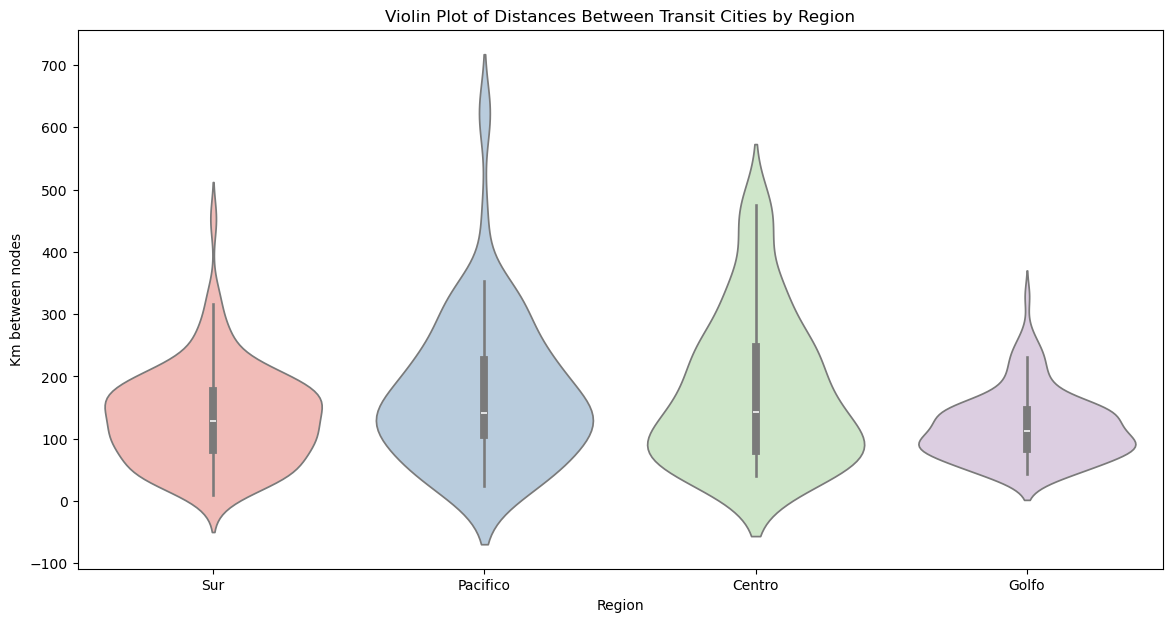

In [71]:
# Configurar el tamaño de la figura
plt.figure(figsize=(14, 7))

# Crear violin plots para cada región
sns.violinplot(data=segmentos_filtered, x='region', y='distancia_', palette='Pastel1')

# Añadir títulos y etiquetas
plt.title('Violin Plot of Distances Between Transit Cities by Region')
plt.xlabel('Region')
plt.ylabel('Km between nodes')
plt.show()

In [48]:
#segmentos.to_file('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/segmentos/segmentos.shp')

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_73377/242722420.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  segmentos.to_file('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/segmentos/segmentos.shp')


In [6]:
# Renombrar la columna 'ciudad' en values_df a 'Ciudad'
#values_df.rename(columns={'ciudad': 'Ciudad'}, inplace=True)

# Realizar la combinación basada en la columna 'Ciudad'
#segmentos = segmentos.merge(values_df[['Ciudad', 'codigo_unico']], on='Ciudad', how='left')

# Verificar los resultados
#print(segmentos.head(20))

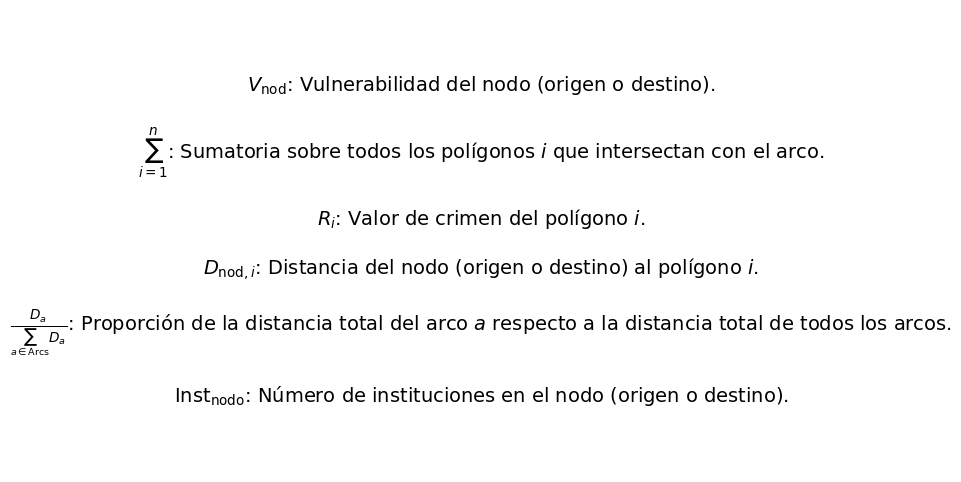

In [47]:
import matplotlib.pyplot as plt

# Define the formula as a LaTeX string with annotations for each symbol using \mathrm instead of \text
formula = r"""
$V_{\mathrm{nod}}$: Vulnerabilidad del nodo (origen o destino).

$\sum_{i=1}^{n}$: Sumatoria sobre todos los polígonos $i$ que intersectan con el arco.

$R_i$: Valor de crimen del polígono $i$.

$D_{\mathrm{nod},i}$: Distancia del nodo (origen o destino) al polígono $i$.

$\frac{D_{a}}{\sum_{a \in \mathrm{Arcs}} D_{a}}$: Proporción de la distancia total del arco $a$ respecto a la distancia total de todos los arcos.

$\mathrm{Inst}_{\mathrm{nodo}}$: Número de instituciones en el nodo (origen o destino).
"""
# Create a figure and axis to display the formula
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust size to fit all text

# Hide the axis
ax.axis('off')

# Display the formula
ax.text(0.5, 0.5, formula, fontsize=14, ha='center', va='center')

# Show the plot
plt.show()


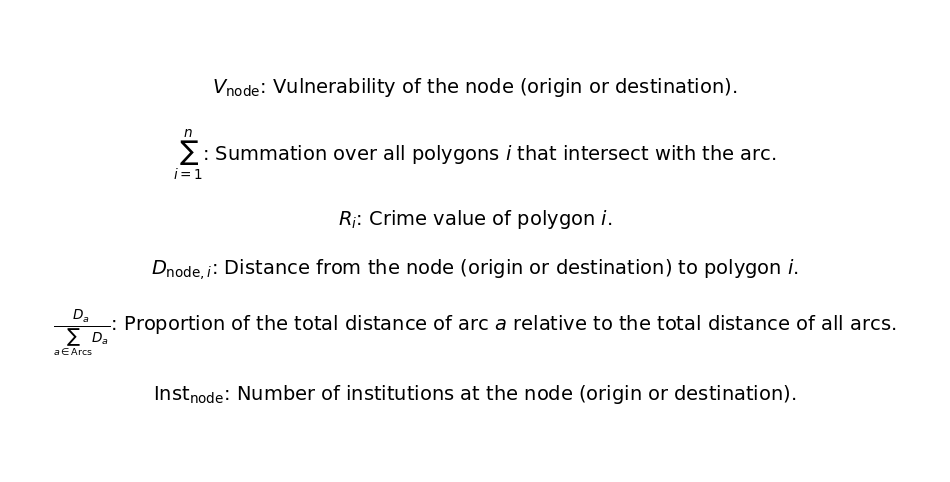

In [12]:


# Define the formula as a LaTeX string with annotations for each symbol using \mathrm instead of \text
formula = r"""
$V_{\mathrm{node}}$: Vulnerability of the node (origin or destination).

$\sum_{i=1}^{n}$: Summation over all polygons $i$ that intersect with the arc.

$R_i$: Crime value of polygon $i$.

$D_{\mathrm{node},i}$: Distance from the node (origin or destination) to polygon $i$.

$\frac{D_{a}}{\sum_{a \in \mathrm{Arcs}} D_{a}}$: Proportion of the total distance of arc $a$ relative to the total distance of all arcs.

$\mathrm{Inst}_{\mathrm{node}}$: Number of institutions at the node (origin or destination).
"""
# Create a figure and axis to display the formula
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust size to fit all text

# Hide the axis
ax.axis('off')

# Display the formula
ax.text(0.5, 0.5, formula, fontsize=14, ha='center', va='center')

# Show the plot
plt.show()

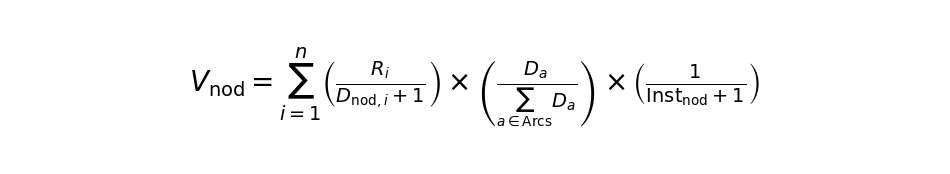

In [41]:
import matplotlib.pyplot as plt

# Define the formula as a LaTeX string with proper sigma notation
formula = r"$V_{\mathrm{nod}} = \sum_{i=1}^{n} \left( \frac{R_i}{D_{\mathrm{nod},i} + 1} \right) \times \left( \frac{D_a}{\sum_{a \in \mathrm{Arcs}} D_a} \right) \times \left( \frac{1}{\mathrm{Inst}_{\mathrm{nod}} + 1} \right)$"


# Create a figure and axis to display the formula
fig, ax = plt.subplots(figsize=(12, 2))

# Hide the axis
ax.axis('off')

# Display the formula
ax.text(0.5, 0.5, formula, fontsize=20, ha='center', va='center')

# Show the plot
plt.show()


In [50]:
arc_df = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.csv")
arc_df.head()

,Unnamed: 0,Arc,ciudad_origen,ciudad_destino,eventos_arco,geometry,distance,duration,distance_km,duration_min
0,0,PG1529-PG1530,"Suchiate, Chiapas","Tapachula, Chiapas",124475,"LINESTRING (-92.23982 14.63441, -92.23938 14.6...",35.6 km,8 hours 8 mins,35.6,488
1,1,PG1530-PG1491,"Tapachula, Chiapas","Mapastepec, Chiapas",98522,"LINESTRING (-92.26123 14.90446, -92.26156 14.9...",103 km,22 hours 57 mins,103.0,1377
2,2,PG1491-PG1492,"Mapastepec, Chiapas","Pijijiapan, Chiapas",11333,"LINESTRING (-92.8986 15.44007, -92.89826 15.44...",45.3 km,10 hours 8 mins,45.3,608
3,3,PG1492-PG1453,"Pijijiapan, Chiapas","Arriaga, Chiapas",31136,"LINESTRING (-93.20811 15.68506, -93.20779 15.6...",101 km,22 hours 36 mins,101.0,1356
4,4,PG1453-PG1414,"Arriaga, Chiapas","Chahuites, Oaxaca",19893,"LINESTRING (-93.90072 16.23439, -93.90258 16.2...",36.4 km,8 hours 9 mins,36.4,489


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_14633/1816850421.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<AxesSubplot:>

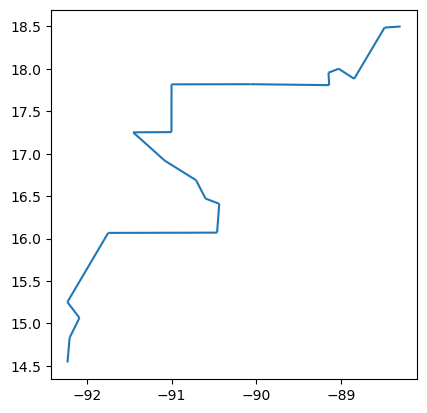

In [5]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mexico = world[world.name == "Mexico"]
guatemala = world[world.name == "Guatemala"]
belize = world[world.name == "Belize"]
mexico_geom = mexico.geometry.iloc[0]
guatemala_geom = guatemala.geometry.iloc[0]
belize_geom = belize.geometry.iloc[0]
frontera_sur_guatemala = mexico_geom.intersection(guatemala_geom)
frontera_sur_belize = mexico_geom.intersection(belize_geom)
fronteras_sur = gpd.GeoDataFrame(geometry=[frontera_sur_guatemala, frontera_sur_belize])
#fronteras_sur.to_file('frontera_sur_mexico.shp')
fronteras_sur.plot()

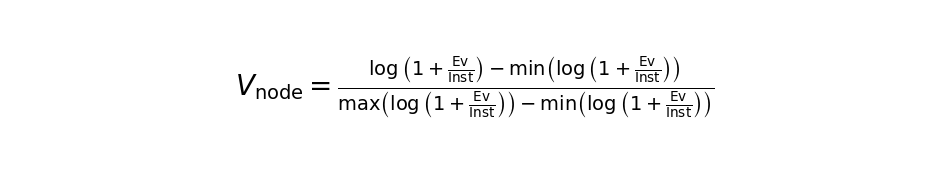

In [13]:
import matplotlib.pyplot as plt

# Define the formula as a LaTeX string
formula = r"$V_{\mathrm{node}} = \frac{\log \left(1 + \frac{\mathrm{Ev}}{\mathrm{Inst}}\right) - \min \left(\log \left(1 + \frac{\mathrm{Ev}}{\mathrm{Inst}}\right)\right)}{\max \left(\log \left(1 + \frac{\mathrm{Ev}}{\mathrm{Inst}}\right)\right) - \min \left(\log \left(1 + \frac{\mathrm{Ev}}{\mathrm{Inst}}\right)\right)}$"

# Create a figure and axis to display the formula
fig, ax = plt.subplots(figsize=(12, 2))

# Hide the axis
ax.axis('off')

# Display the formula
ax.text(0.5, 0.5, formula, fontsize=20, ha='center', va='center')

# Show the plot
plt.show()



# costos

In [2]:
df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.csv')

In [13]:
df.head(2)

,nombre,Ciudad,estado,geometry_xy,region,ID_Poligono,codigo_unico,eventos,eventos_in_grid,inm_30km,inm_in_grid,inm_in_estado,sc_30km,sc_in_grid,sc_in_estado,distance_km,rellenado,log_eventos_per_inm_30km,norm_log_eventos_per_inm_30km,eventos_per_inm_30km
0,"Tapachula, Chiapas","Tapachula, Chiapas",Chiapas,POINT (-92.2609265 14.9042905),Sur,PG1530,S-PG1530-8,98486,142180,2,4,13,17,11,35,11.8,False,10.804543,0.0,49243.0
1,"Huimanguillo, Tabasco","Huimanguillo, Tabasco",Tabasco,POINT (-93.6634408051158 17.7620967),Golfo,PG1456,G-PG1456-1,97523,97523,0,0,3,0,0,0,302.0,False,inf,NaN,inf


### instituciones

- necesito actualizar la lista y eliminar repetidos, necesito aumentar el tamaño de la lista

In [4]:
directorio_full = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/instituciones/SC/instituciones_sc_1.csv')

In [12]:
directorio_full.head(2)

,name,ciudad,estado,tipo,subtipo,latitud,longitud,direccion,ID_Poligono,geometry_xy
0,Angeles Sin Fronteras,"Mexicali, Baja California",Baja California,OSC / ONG,Centros de Asistencia Social,32.662937,-115.494983,"Av. Reforma 244, Altos Zona Centro C.P.21100",PG268,POINT (-115.4949834 32.66293698)
1,Centro de Apoyo al Trabajor Migrante,"Mexicali, Baja California",Baja California,OSC / ONG,Centros de Asistencia Social,32.660848,-115.479494,"Jabonera 6, Col. Nueva C.P. 21100",PG268,POINT (-115.4794935 32.66084772)


In [8]:
import geopandas as gpd
from shapely.geometry import Point

directorio_full['geometry_xy'] = directorio_full.apply(lambda row: Point(row['longitud'], row['latitud']), axis=1)

directorio_full_gdf = gpd.GeoDataFrame(directorio_full, geometry='geometry_xy')


In [26]:
from shapely.geometry import Point
import matplotlib.pyplot as plt
import folium
# Crear un mapa centrado en México
mapa = folium.Map(location=[23.6345, -102.5528], zoom_start=5)

# Añadir puntos al mapa
for idx, row in directorio_full_gdf.iterrows():
    folium.Marker([row['latitud'], row['longitud']],
                  popup=row['name']).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save('mapa_instituciones.html')

# Mostrar el mapa en un notebook (si estás usando Jupyter)
#mapa

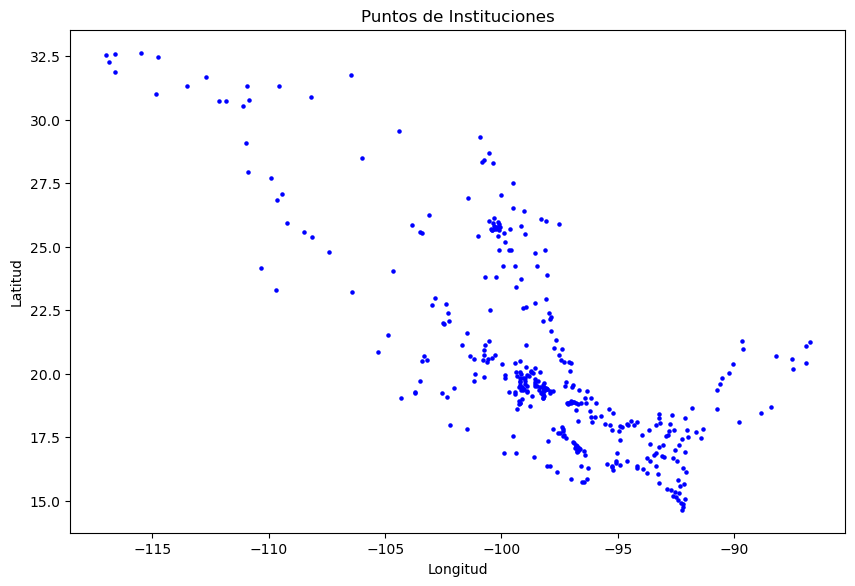

In [25]:
# Visualizar el GeoDataFrame en un mapa
fig, ax = plt.subplots(figsize=(10, 10))
df_filtered_gdf.plot(ax=ax, color='blue', markersize=5)

# Personalizar el mapa
ax.set_title('Puntos de Instituciones')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show()

In [27]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Filtrar el dataframe 'df' para conservar solo las columnas deseadas
df_filtered = df[['nombre', 'Ciudad', 'estado', 'geometry_xy', 'region', 'codigo_unico']]

# Convertir la columna 'geometry_xy' de cadena a objetos Point, si es necesario
def convert_to_point(geom):
    if isinstance(geom, str):
        # Extraer las coordenadas del string
        geom = geom.replace('POINT (', '').replace(')', '')
        lon, lat = map(float, geom.split())
        return Point(lon, lat)
    return geom

df_filtered['geometry_xy'] = df_filtered['geometry_xy'].apply(convert_to_point)

# Convertir el DataFrame a GeoDataFrame
df_filtered_gdf = gpd.GeoDataFrame(df_filtered, geometry='geometry_xy')

# Configurar el sistema de coordenadas (CRS)
df_filtered_gdf.set_crs(epsg=4326, inplace=True)

# Función para crear un polígono circular de 30 km de diámetro alrededor de un punto
def create_buffer(point, distance_km):
    # Convertir la distancia de km a metros
    distance_meters = distance_km * 1000
    return point.buffer(distance_meters / 111320)  # Aproximadamente 1 grado de latitud = 111.32 km

# Aplicar la función a cada punto en la columna 'geometry_xy'
df_filtered_gdf['buffer_30km'] = df_filtered_gdf['geometry_xy'].apply(lambda x: create_buffer(x, 30))



/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_982/538715393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['geometry_xy'] = df_filtered['geometry_xy'].apply(convert_to_point)
/Users/pablouriarte/opt/anaconda3/lib/python3.9/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


In [28]:
df_filtered_gdf.head()

,nombre,Ciudad,estado,geometry_xy,region,codigo_unico,buffer_30km
0,"Tapachula, Chiapas","Tapachula, Chiapas",Chiapas,POINT (-92.26093 14.90429),Sur,S-PG1530-8,"POLYGON ((-91.99143 14.90429, -91.99273 14.877..."
1,"Huimanguillo, Tabasco","Huimanguillo, Tabasco",Tabasco,POINT (-93.66344 17.76210),Golfo,G-PG1456-1,"POLYGON ((-93.39395 17.76210, -93.39525 17.735..."
2,"Centro, Tabasco","Centro, Tabasco",Tabasco,POINT (-92.77479 18.02716),Golfo,G-PG1495-6,"POLYGON ((-92.50530 18.02716, -92.50660 18.000..."
3,"Acayucan, Veracruz","Acayucan, Veracruz",Veracruz,POINT (-94.91458 17.94879),Golfo,G-PG1378-4,"POLYGON ((-94.64508 17.94879, -94.64638 17.922..."
4,"Tenosique, Tabasco","Tenosique, Tabasco",Tabasco,POINT (-91.42202 17.47071),Golfo,G-PG1572-3,"POLYGON ((-91.15253 17.47071, -91.15383 17.444..."


In [37]:
# Crear un DataFrame vacío para los resultados
df_costos = pd.DataFrame()

# Iterar sobre cada fila de df_filtered_gdf
for idx, row in df_filtered_gdf.iterrows():
    buffer = row['buffer_30km']
    
    # Buscar puntos en directorio_full_gdf que estén dentro del buffer
    points_within_buffer = directorio_full_gdf[directorio_full_gdf['geometry_xy'].within(buffer)]
    
    # Crear un DataFrame con la fila actual de df_filtered_gdf
    row_df = pd.DataFrame([row])
    
    # Añadir las filas encontradas a df_costos debajo de la fila actual de df_filtered_gdf
    df_costos = pd.concat([df_costos, row_df, points_within_buffer], ignore_index=True)

# Mostrar el DataFrame resultante
print(df_costos.head(20))

                   nombre                 Ciudad   estado  \
0      Tapachula, Chiapas     Tapachula, Chiapas  Chiapas   
1                     NaN                    NaN  Chiapas   
2                     NaN                    NaN  Chiapas   
3                     NaN                    NaN  Chiapas   
4                     NaN                    NaN  Chiapas   
5                     NaN                    NaN  Chiapas   
6                     NaN                    NaN  Chiapas   
7                     NaN                    NaN  Chiapas   
8                     NaN                    NaN  Chiapas   
9                     NaN                    NaN  Chiapas   
10                    NaN                    NaN  Chiapas   
11                    NaN                    NaN  Chiapas   
12                    NaN                    NaN  Chiapas   
13                    NaN                    NaN  Chiapas   
14                    NaN                    NaN  Chiapas   
15                    Na

In [47]:
from shapely.geometry import LineString

df_costos_gdf = gpd.GeoDataFrame(df_costos, geometry='geometry_xy')

df_costos_gdf['linea'] = None

last_valid_row = None

# Iterar sobre cada fila en df_costos_gdf
for idx, row in df_costos_gdf.iterrows():
    if pd.isna(row['codigo_unico']):
        if last_valid_row is not None:
            # Crear una línea desde la fila actual hasta la última fila válida
            line = LineString([last_valid_row['geometry_xy'], row['geometry_xy']])
            df_costos_gdf.at[idx, 'linea'] = line
    else:
        # Actualizar la última fila válida
        last_valid_row = row

In [53]:
df_costos_gdf
#/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/instituciones

,nombre,Ciudad,estado,region,codigo_unico,name,ciudad,tipo,subtipo,latitud,longitud,direccion,ID_Poligono,linea
0,"Tapachula, Chiapas","Tapachula, Chiapas",Chiapas,Sur,S-PG1530-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,NaN,NaN,Chiapas,NaN,NaN,Albergue infantil La Esperanza,"Tapachula, Chiapas",OSC / ONG,Centros de Asistencia Social,14.924906,-92.256080,"3ra. Calle Ote. #37, Col. Centro C.P. 30830,Ta...",PG1530,"LINESTRING (-92.2609265 14.9042905, -92.256080..."
2,NaN,NaN,Chiapas,NaN,NaN,"Centro de Atencion a ninas, ninos y jovenes mi...","Tapachula, Chiapas",OSC / ONG,Centros de Asistencia Social,14.918504,-92.251466,"Calle Quinta, Privada sur #29, esquina 4ta Ori...",PG1530,"LINESTRING (-92.2609265 14.9042905, -92.251465..."
3,NaN,NaN,Chiapas,NaN,NaN,Todo por Ellos,"Tapachula, Chiapas",OSC / ONG,Centros de Asistencia Social,14.912974,-92.268089,"Calle 14 Norte 30, Col. Centro C.P. 30700",PG1530,"LINESTRING (-92.2609265 14.9042905, -92.268089..."
4,NaN,NaN,Chiapas,NaN,NaN,Albergue Municipal para Ninas y Ninos Migrantes,"Tapachula, Chiapas",OSC / ONG,Centros de Asistencia Social,14.910549,-92.270067,"6a. Norte y 19a. Poniente, Col. Centro Tapachu...",PG1530,"LINESTRING (-92.2609265 14.9042905, -92.270066..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,NaN,NaN,Estado de Mexico,NaN,NaN,Centro Fray Julian Garces A. C.,"Texcoco, Estado de Mexico",OSC / ONG,Centros de Asistencia Social,19.311676,-98.244207,"Calle 11 No. 214,Loma Xicohtencatl, Tlaxcala",PG1224,"LINESTRING (-98.167778 19.348889, -98.2442069 ..."
1763,NaN,NaN,Estado de Mexico,NaN,NaN,San Felipe Hueyotlipan,"Texcoco, Estado de Mexico",OSC / ONG,Centros de Asistencia Social,19.085963,-98.210975,"Calle 5 de Febrero 1, Col. San Felipe Hueyotli...",PG1223,"LINESTRING (-98.167778 19.348889, -98.2109754 ..."
1764,"Chicomuselo, Chiapas","Chicomuselo, Chiapas",Chiapas,Sur,S-PG1531-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1765,"Carlos A. Carrillo, Veracruz","Carlos A. Carrillo, Veracruz",Veracruz,Golfo,G-PG1339-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [58]:
# Asignar CRS al GeoDataFrame original
#df_costos_gdf.set_crs(epsg=4326, inplace=True)

In [56]:
# Convertir df_costos_gdf a un GeoDataFrame nuevamente (por si acaso)
df_costos_gdf = gpd.GeoDataFrame(df_costos_gdf, geometry='linea', crs="EPSG:4326")

# Definir el sistema de coordenadas proyectado (UTM) que se utilizará para medir en metros
utm_crs = "EPSG:32614"  # UTM Zone 14N, por ejemplo. Debes ajustar esto según tu área de interés.

# Convertir el GeoDataFrame a UTM
df_costos_gdf_utm = df_costos_gdf.to_crs(utm_crs)

# Crear una nueva columna para las distancias
df_costos_gdf_utm['distancia_metros'] = None

# Calcular la distancia en metros para cada fila con un valor en 'linea'
for idx, row in df_costos_gdf_utm.iterrows():
    if row['linea'] is not None:
        df_costos_gdf_utm.at[idx, 'distancia_metros'] = row['linea'].length

# Convertir de nuevo al CRS original (EPSG:4326)
df_costos_gdf_final = df_costos_gdf_utm.to_crs(epsg=4326)






In [59]:
# Crear una columna 'group_id' para identificar los grupos de filas
group_id = 0
group_ids = []
nan_counts = []
nan_count = 0

for idx, row in df_costos_gdf_final.iterrows():
    if pd.isna(row['codigo_unico']):
        group_ids.append(group_id)
        nan_count += 1
    else:
        if idx != 0:
            # Asignar el conteo de NaNs al grupo anterior
            for _ in range(nan_count):
                nan_counts.append(nan_count)
            nan_counts.append(0)
        group_id += 1
        group_ids.append(group_id)
        nan_count = 0

# Asignar el conteo de NaNs al último grupo
for _ in range(nan_count):
    nan_counts.append(nan_count)
nan_counts.append(0)

# Añadir las columnas 'group_id' y 'nan_count' al GeoDataFrame
df_costos_gdf_final['group_id'] = group_ids
df_costos_gdf_final['nan_count'] = nan_counts

In [60]:
df_costos_gdf_final

,nombre,Ciudad,estado,region,codigo_unico,name,ciudad,tipo,subtipo,latitud,longitud,direccion,ID_Poligono,linea,distancia_metros,group_id,nan_count
0,"Tapachula, Chiapas","Tapachula, Chiapas",Chiapas,Sur,S-PG1530-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,1,17
1,NaN,NaN,Chiapas,NaN,NaN,Albergue infantil La Esperanza,"Tapachula, Chiapas",OSC / ONG,Centros de Asistencia Social,14.924906,-92.256080,"3ra. Calle Ote. #37, Col. Centro C.P. 30830,Ta...",PG1530,"LINESTRING (-92.26093 14.90429, -92.25608 14.9...",2354.213605,1,17
2,NaN,NaN,Chiapas,NaN,NaN,"Centro de Atencion a ninas, ninos y jovenes mi...","Tapachula, Chiapas",OSC / ONG,Centros de Asistencia Social,14.918504,-92.251466,"Calle Quinta, Privada sur #29, esquina 4ta Ori...",PG1530,"LINESTRING (-92.26093 14.90429, -92.25147 14.9...",1884.903102,1,17
3,NaN,NaN,Chiapas,NaN,NaN,Todo por Ellos,"Tapachula, Chiapas",OSC / ONG,Centros de Asistencia Social,14.912974,-92.268089,"Calle 14 Norte 30, Col. Centro C.P. 30700",PG1530,"LINESTRING (-92.26093 14.90429, -92.26809 14.9...",1239.256213,1,17
4,NaN,NaN,Chiapas,NaN,NaN,Albergue Municipal para Ninas y Ninos Migrantes,"Tapachula, Chiapas",OSC / ONG,Centros de Asistencia Social,14.910549,-92.270067,"6a. Norte y 19a. Poniente, Col. Centro Tapachu...",PG1530,"LINESTRING (-92.26093 14.90429, -92.27007 14.9...",1210.127572,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,NaN,NaN,Estado de Mexico,NaN,NaN,Centro Fray Julian Garces A. C.,"Texcoco, Estado de Mexico",OSC / ONG,Centros de Asistencia Social,19.311676,-98.244207,"Calle 11 No. 214,Loma Xicohtencatl, Tlaxcala",PG1224,"LINESTRING (-98.16778 19.34889, -98.24421 19.3...",9023.293901,386,4
1763,NaN,NaN,Estado de Mexico,NaN,NaN,San Felipe Hueyotlipan,"Texcoco, Estado de Mexico",OSC / ONG,Centros de Asistencia Social,19.085963,-98.210975,"Calle 5 de Febrero 1, Col. San Felipe Hueyotli...",PG1223,"LINESTRING (-98.16778 19.34889, -98.21098 19.0...",29447.676253,386,0
1764,"Chicomuselo, Chiapas","Chicomuselo, Chiapas",Chiapas,Sur,S-PG1531-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,387,0
1765,"Carlos A. Carrillo, Veracruz","Carlos A. Carrillo, Veracruz",Veracruz,Golfo,G-PG1339-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,388,0


In [61]:
# Guardar el resultado en el archivo Shapefile en el path especificado
output_path_shp = '/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/instituciones/df_costos_with_distances.shp'
df_costos_gdf_final.to_file(output_path_shp, driver='ESRI Shapefile')

# Confirmar la ruta de guardado
print(f"GeoDataFrame guardado en: {output_path_shp}")


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_982/3103232351.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_costos_gdf_final.to_file(output_path_shp, driver='ESRI Shapefile')


GeoDataFrame guardado en: /Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/instituciones/df_costos_with_distances.shp
